In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=16, repr.plot.height=8)

# Exercise 1

### - the number of claims received by an insurance company during a week follows a Poisson distribution with unknown mean (μ)
### - the number of claims, per week, observed over a ten week period are: 5, 8, 4, 6, 11, 6, 6, 5, 6, 4

In [2]:
claims <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)

### (a) suppose to use a prior uniform distribution for μ

Looking at the data provided, I see that the maximum number of claims is 11, but the mean should be around 6. For the prior I take the boundaries 0-12, so that all the data is within this interval and I can get a nicely looking posterior in this interval.

In [3]:
n_samples <- 1000
delta_p <- 1/n_samples
p <- seq(0, 12, length.out = 1/delta_p)

prior <- dunif(p, 0, 12)

### - find the posterior distribution for μ and compute the posterior mean, median and variance

The posterior is the Gamma distribution with $\alpha = \sum_j y_j + 1, \lambda = n$

In [4]:
alpha_uni <- sum(claims) + 1
lambda_uni <- length(claims)

posterior_uni <- dgamma(p, alpha_uni, lambda_uni)

In [5]:
mean_var_median_for_gamma <- function(alpha, lambda, prior) {
    
mean <- alpha/lambda
var <- alpha/lambda**2
median <- round(qgamma(0.5, alpha, lambda), 2)

cat('Mean of the posterior for a', prior, 'prior:', mean, '\n')
cat('Variance of the posterior for', prior, 'prior:', var, '\n')
cat('Median of the posterior for a', prior, 'prior:', median, '\n')
    
return(list('mean' = mean, 'var' = var, 'median' = median))   
}

char_uni <- mean_var_median_for_gamma(alpha_uni, lambda_uni, 'uniform')

Mean of the posterior for a uniform prior: 6.2 
Variance of the posterior for uniform prior: 0.62 
Median of the posterior for a uniform prior: 6.17 


### - plot the posterior distribution and the 95% credibility interval

In [6]:
ci_limits <- function(q, alpha, lambda){
    lower_limit <- qgamma(q, alpha, lambda)
    upper_limit <- qgamma(1-q, alpha, lambda)
    return( list('lower' = lower_limit,
                 'upper' = upper_limit))
}


limits_uni <- ci_limits(0.05, alpha_uni, lambda_uni)

cat('95% credibility interval: [', round(limits_uni$lower,3),
    ',', round(limits_uni$upper,3), ']', sep='' )

95% credibility interval: [4.964,7.549]

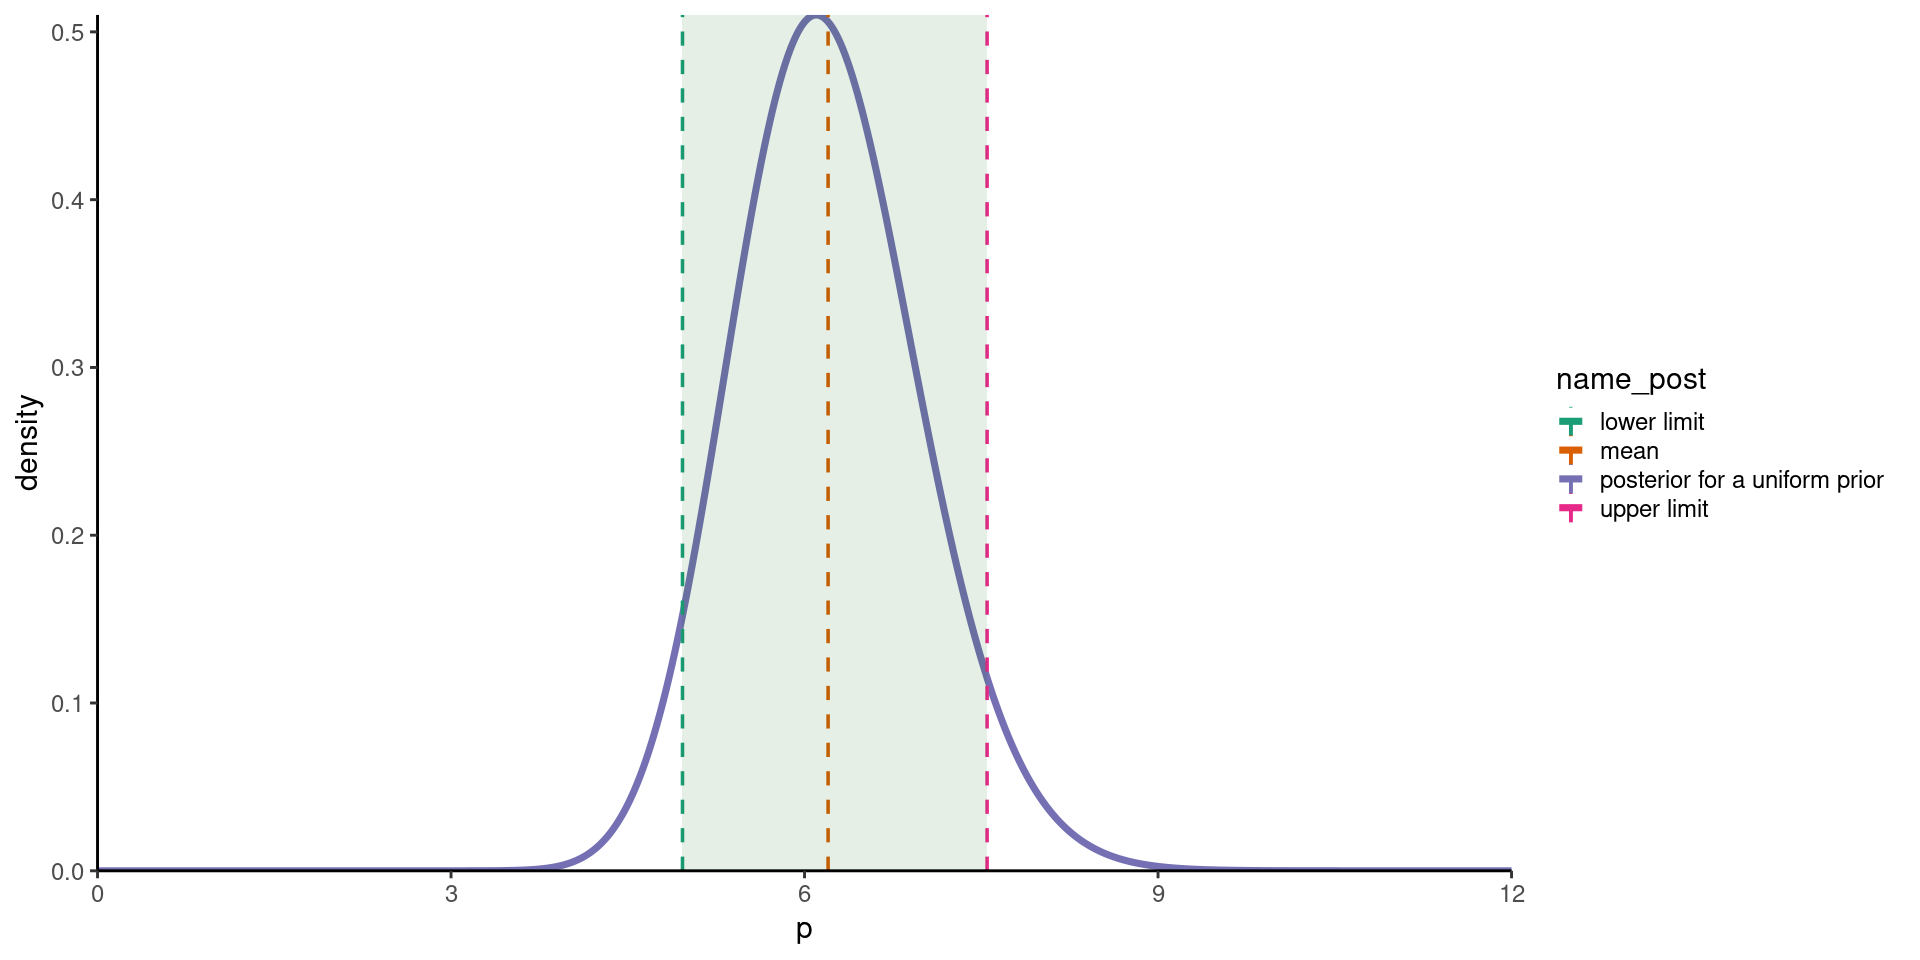

In [7]:
plotting_95 <- function(posterior, name_post, char, limits, set) {

    ggplot() +
    geom_line(aes(x = p, y = posterior, colour = name_post), linewidth = 2) +
    geom_vline(aes(xintercept = char$mean, colour = 'mean'), linetype = 'dashed', linewidth = 1) +
    geom_vline(aes(xintercept = limits$lower, colour = 'lower limit'), linetype = 'dashed', linewidth = 1) +
    geom_vline(aes(xintercept = limits$upper, colour = 'upper limit'), linetype = 'dashed', linewidth = 1) +
    geom_ribbon(aes(y = posterior, xmax = limits$upper, xmin = limits$lower),
            fill = 'darkgreen', alpha=0.1) +
    scale_x_continuous(name= 'p',expand = c(0, 0))+
    scale_y_continuous(name = 'density', expand = c(0, 0))+
    theme_classic(base_size=18) +
    scale_color_brewer(palette = set)  
    }


p1_uni <- plotting_95(posterior_uni, 'posterior for a uniform prior', char_uni, limits_uni, 'Dark2')

p1_uni

### (b) suppose to use a Jeffreys’ prior for μ ($g(\mu) \propto \frac{1}{\sqrt{\mu}}$)

In [8]:
prior_jeffreys <- dbeta(p, 0.5, 0.5)/(sum(delta_p*dbeta(p, 0.5, 0.5)))

### - find the posterior distribution for μ and compute the posterior mean, median and variance

For the Jeffrey's prior the posterior is a Gamma distribution with $\alpha = \sum_j y_j + \frac{1}{2}, \lambda = n$

In [9]:
alpha_jeffreys <- sum(claims) + 1/2
lambda_jeffreys <- length(claims)

posterior_jeffreys <- dgamma(p, alpha_jeffreys, lambda_jeffreys)


char_jeffreys <- mean_var_median_for_gamma(alpha_jeffreys, lambda_jeffreys, 'Jeffreys')

Mean of the posterior for a Jeffreys prior: 6.15 
Variance of the posterior for Jeffreys prior: 0.615 
Median of the posterior for a Jeffreys prior: 6.12 


### - plot the posterior distribution and the 95% credibility interval

In [10]:
limits_jeffreys <- ci_limits(0.05, alpha_jeffreys, lambda_jeffreys)

cat('95% credibility interval: [', round(limits_jeffreys$lower,3),
    ',', round(limits_jeffreys$upper,3), ']', sep='' )

95% credibility interval: [4.919,7.494]

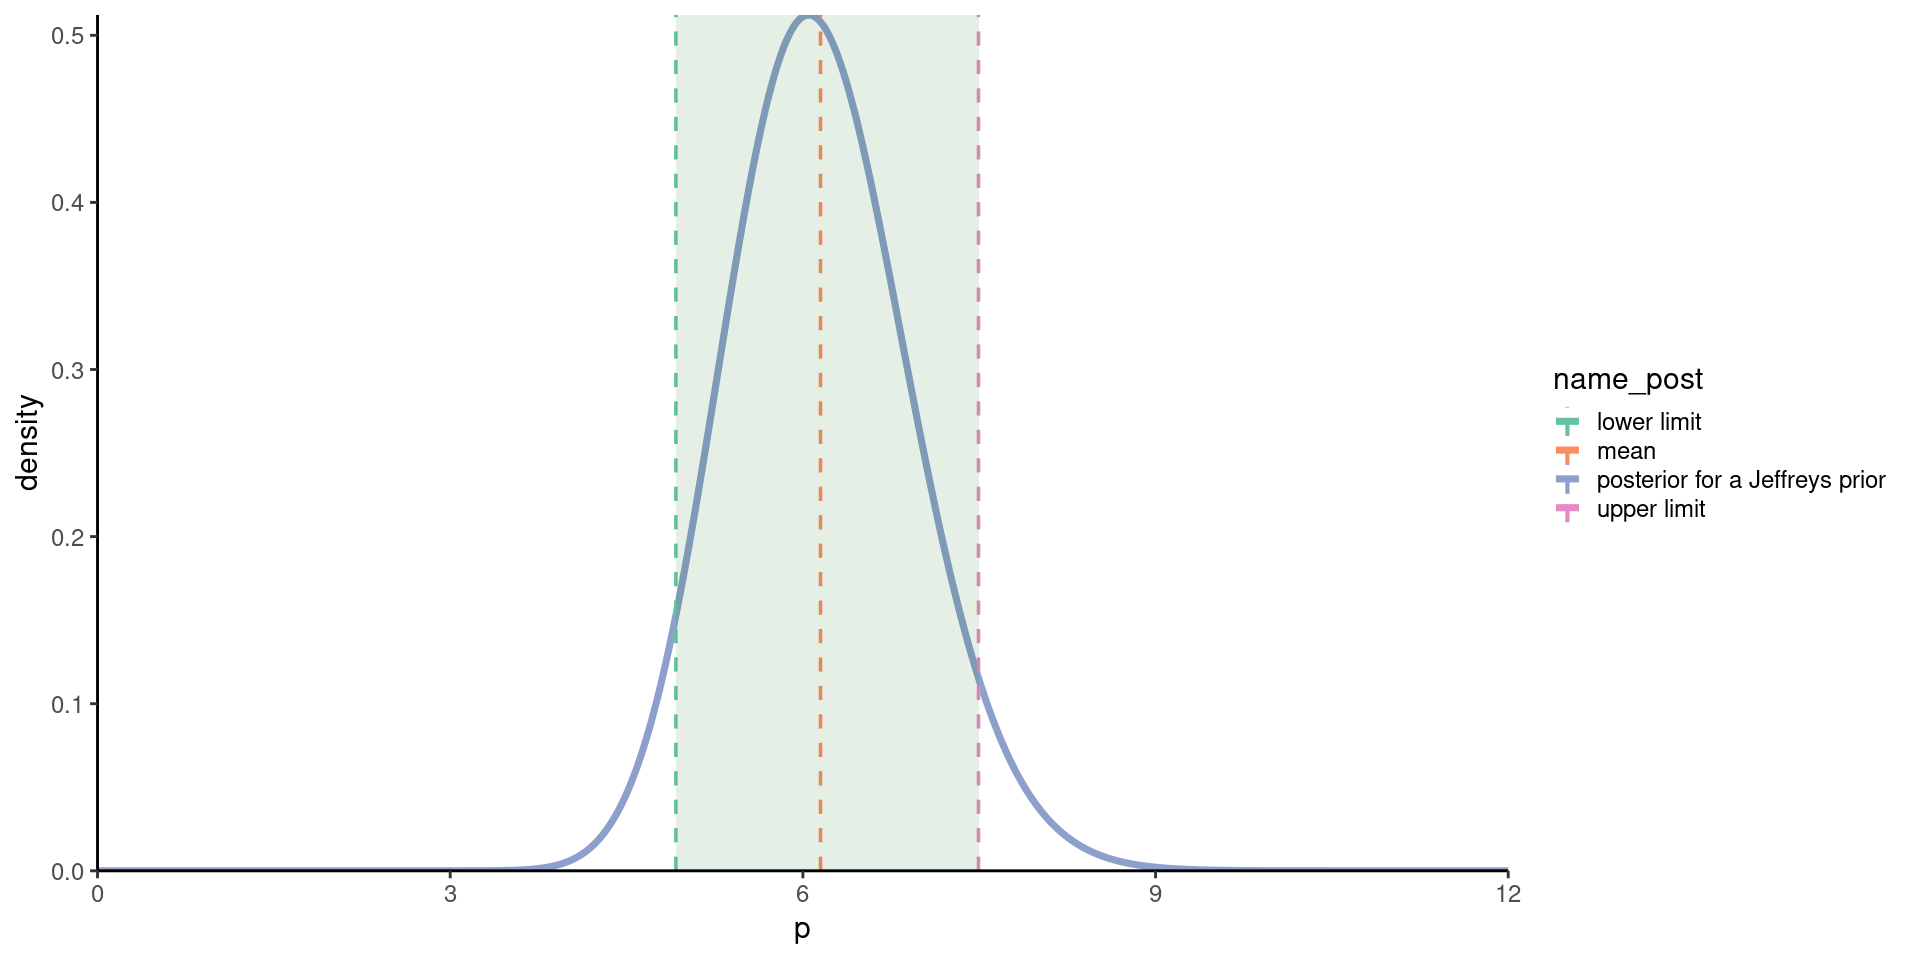

In [11]:
p2_jeffreys <- plotting_95(posterior_jeffreys, 'posterior for a Jeffreys prior', char_jeffreys,
                           limits_jeffreys, 'Set2')

p2_jeffreys

### c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [12]:
norm_approx_uni <- dnorm(p, char_uni$mean, sqrt(char_uni$var))
norm_approx_jeffreys <- dnorm(p, char_jeffreys$mean, sqrt(char_jeffreys$var))


q <- 0.05
limits_norm_uni <- list('lower' = qnorm(q, char_uni$mean, sqrt(char_uni$var)),
                        'upper' = qnorm(1-q, char_uni$mean, sqrt(char_uni$var)))

limits_norm_jeffreys <- list('lower' = qnorm(q, char_jeffreys$mean, sqrt(char_jeffreys$var)),
                        'upper' = qnorm(1-q, char_jeffreys$mean, sqrt(char_jeffreys$var)))

p1_norm <- plotting_95(norm_approx_uni, 'Normal approximation', char_uni,
                           limits_norm_uni, 'Dark2')


p2_norm <- plotting_95(norm_approx_jeffreys, 'Normal approximation', char_jeffreys,
                           limits_norm_jeffreys, 'Set2')

Uniform prior 
95% credibility interval for gamma posterior: [4.964,7.549] 
95% credibility interval for normal approximation: [4.905,7.495] 


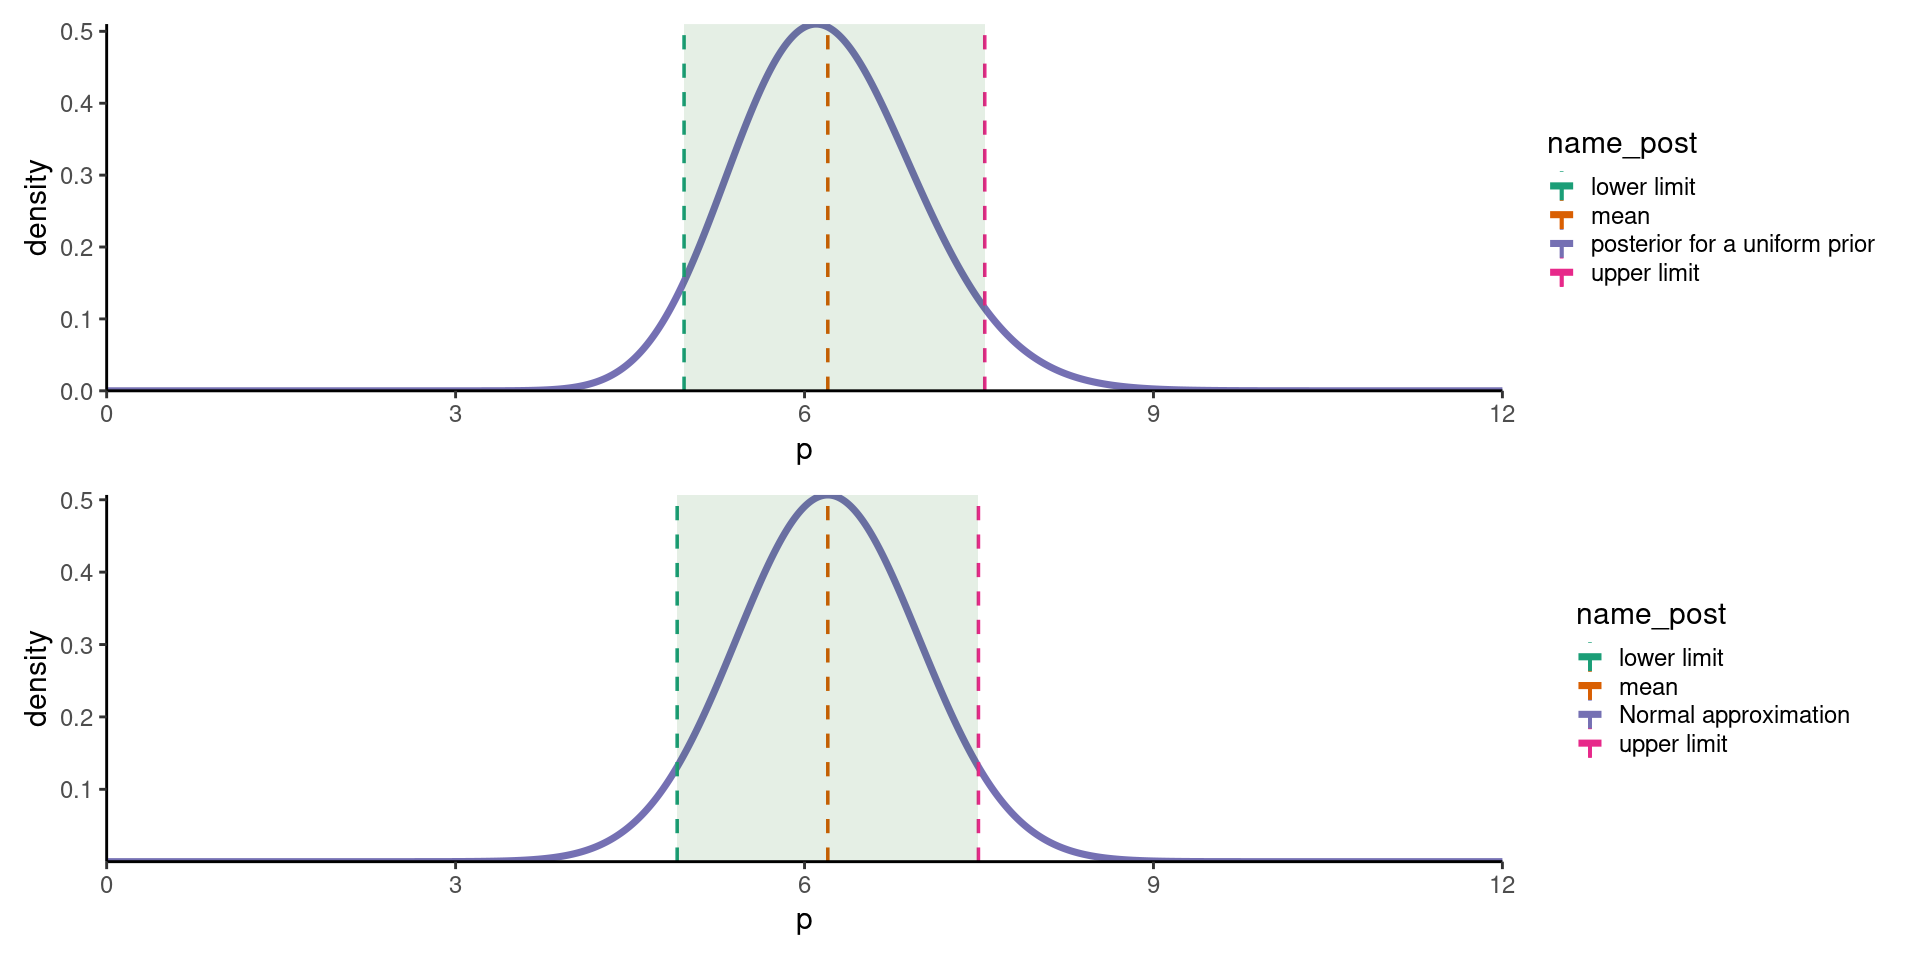

In [13]:
library(patchwork)

cat('Uniform prior \n')

p1_uni / p1_norm

cat('95% credibility interval for gamma posterior: [', round(limits_uni$lower,3),
    ',', round(limits_uni$upper,3), '] \n', sep='')
cat('95% credibility interval for normal approximation: [', round(limits_norm_uni$lower,3),
    ',', round(limits_norm_uni$upper,3), '] \n', sep='' )

Jeffreys prior 
95% credibility interval for gamma posterior: [4.919,7.494] 
95% credibility interval for normal approximation: [4.86,7.44] 


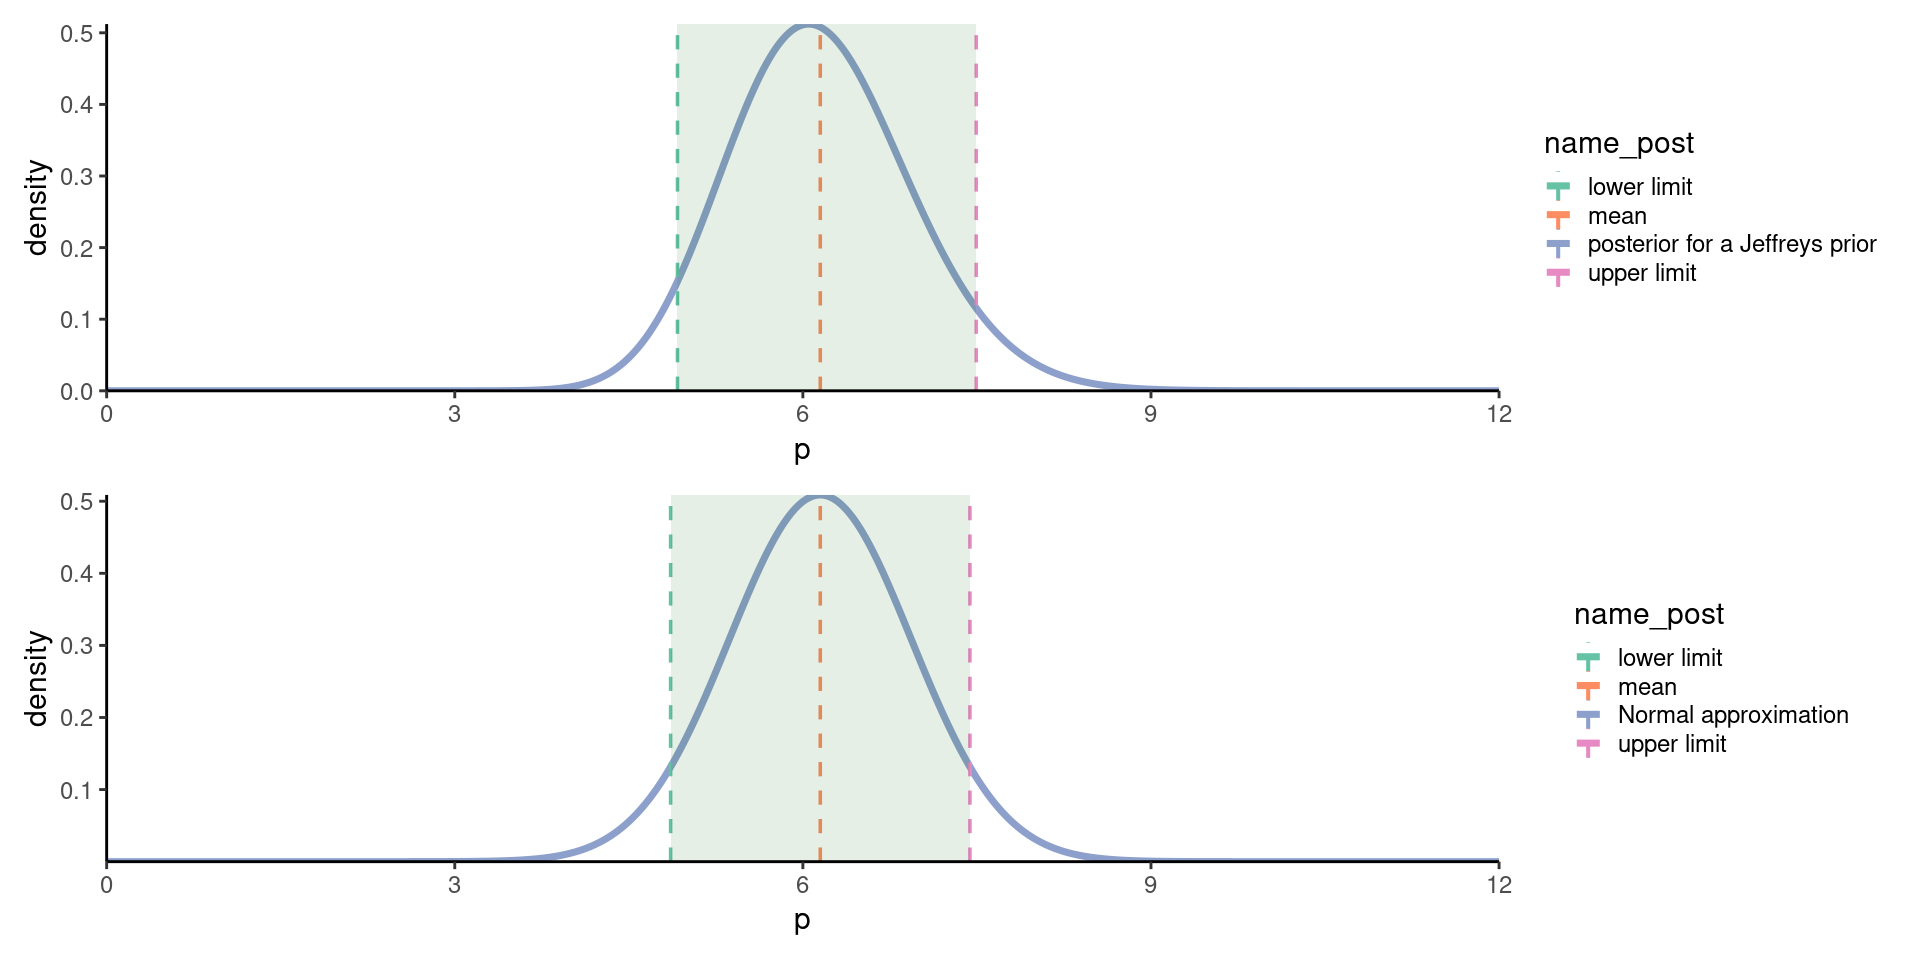

In [14]:
cat('Jeffreys prior \n')

p2_jeffreys / p2_norm

cat('95% credibility interval for gamma posterior: [', round(limits_jeffreys$lower,3),
    ',', round(limits_jeffreys$upper,3), '] \n', sep='')
cat('95% credibility interval for normal approximation: [', round(limits_norm_jeffreys$lower,3),
    ',', round(limits_norm_jeffreys$upper,3), '] \n', sep='' )

# Exercise 2

### - a well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.
### - A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.

### (a) what is the probability distribution of y, the number of times the new method fails to detect the disease?

Assume that we count as a 'success' number of times the method fails to detect the desease and as a 'fail' number of successfull detections. Then we are in the standard situation of a Binomial distribution: $\binom{n}{y}p^y q^{n-y}$.

### (b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method?

An unbiased estimator and the standard deviation for the Binomial distribution are given by

$p_F = \frac{y}{n}$,


$\sigma_f = \sqrt{ \frac{p_f(1 - p_f}{n} }$.

In [15]:
y <- 6
n <- 75

p_f <- y/n
sigma_f <- sqrt(p_f*(1 - p_f)/n)

cat('Frequentist estimator of the failure probability of the method:', p_f, '\n')
cat('Standard deviation:', round(sigma_f,3))

Frequentist estimator of the failure probability of the method: 0.08 
Standard deviation: 0.031

### (c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

Since mean for the Beta ditribution is given by $m = \frac{\alpha}{\alpha + \beta} = p_0$ and the variance is $\sigma_0^2 = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$, we can write that

$\alpha = \frac{p_0(p_0(1 - p_0) - \sigma_0^2)}{\sigma_0^2}$,

$\beta = \frac{\alpha}{p_0} - \alpha$.

Then the posterior will be a Beta distribution with $\alpha ' = \alpha + y, \; \beta ' = \beta + n - y$.

In [16]:
n_samples <- 1000
delta_p <- 1/n_samples
p <- seq(from = 1/(2*n_samples), by = 1/n_samples, length.out = n_samples)


p_0 <- 0.15
std <- 0.14 

alpha_prior <- ( p_0*(p_0*(1 - p_0) - std) )/std
beta_prior <- alpha_prior/p_0 - alpha_prior

alpha_post <- alpha_prior + y
beta_post <- beta_prior + n - y

posterior_bayes <- dbeta(p, alpha_post, beta_post)

mean_post <- alpha_post/(alpha_post + beta_post)
std_post <- (alpha_post*beta_post)/((alpha_post + beta_post)**2*(alpha_post + beta_post + 1))

Warning message:
“Removed 600 rows containing missing values (`geom_line()`).”


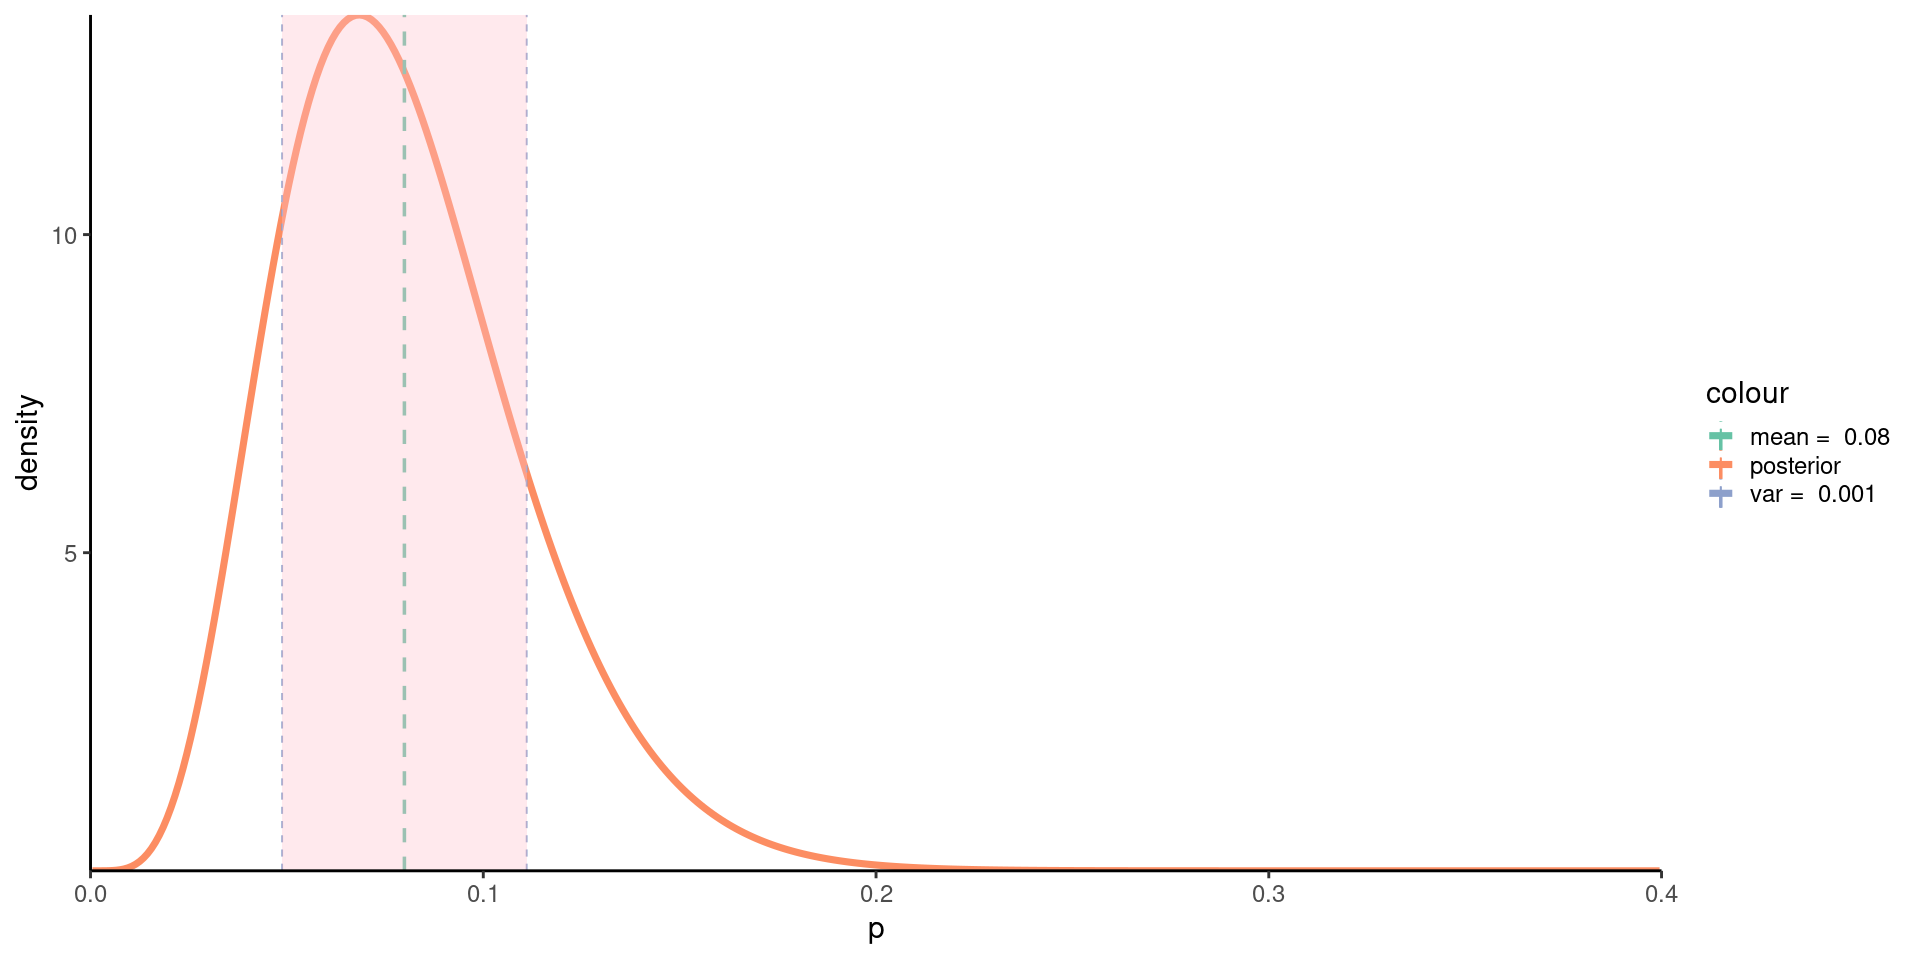

In [17]:
ggplot() +
geom_line(aes(x = p, y = posterior_bayes, colour = 'posterior'), linewidth = 2) +
geom_vline(aes(xintercept = mean_post, colour = paste('mean = ', round(mean_post,3))),
           linetype = 'dashed', linewidth = 1) +
geom_vline(aes(xintercept = mean_post - sqrt(std_post),
               colour = paste('var = ', round(std_post,3))), linetype = 'dashed', linewidth = 0.5) +
geom_vline(aes(xintercept = mean_post + sqrt(std_post),
               colour = paste('var = ', round(std_post,3))), linetype = 'dashed', linewidth = 0.5) +
geom_ribbon(aes(y = posterior_bayes, xmax = mean_post - sqrt(std_post), xmin = mean_post + sqrt(std_post)),
            fill = 'pink', alpha=0.35) +
theme_classic(base_size=18) +
scale_x_continuous(name= 'p',expand = c(0, 0), limits = c(0, 0.4))+
scale_y_continuous(name = 'density', expand = c(0, 0)) +
scale_color_brewer(palette = 'Set2')

### (d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

Null Hypothesis, $H_0$: $p < 0.15$

Alterrnative Hypothesis, $H_1$: $p \geq 0.15$

In [18]:
res <- integrate(function(p){dbeta(p, alpha_post, beta_post)}, lower = 0, upper = 0.15)$value
if (res < 0.05) {
    cat('The Null Hypothesis is rejected, P(p < 0.15) =', res)
} else {
    cat('The Null Hypothesis is accepted, P(p < 0.15) =', res)
}

The Null Hypothesis is accepted, P(p < 0.15) = 0.9741915

### (e) Perform the same hypothesis test in the classical frequentist way

1) Setup a Null Hypothesis, $H_0$: $p < 0.15$

2) The alternative Hypothesis, $H_1$: $p \geq 0.15$

3) The Null distribution of the test statistic is the sampling distribution of the test statistic, given that the Null Hypothesis is true: Binom(y|n, p = 0.15)

4) Choose the level of significance: $\alpha = 5 \%$

5) The rejection region is chosen so that it has a probability of $\alpha$ under the NULL distribution (Neyman and Pearson approach) $y = 6$ lies in the acceptance region -> we do not reject $H_0$

6) If p-value $< \alpha$ -> the test statistic lies in the rejection region

7) An alternative way, due to Fisher, is to reject $H_0$ if p-value $< \alpha$.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


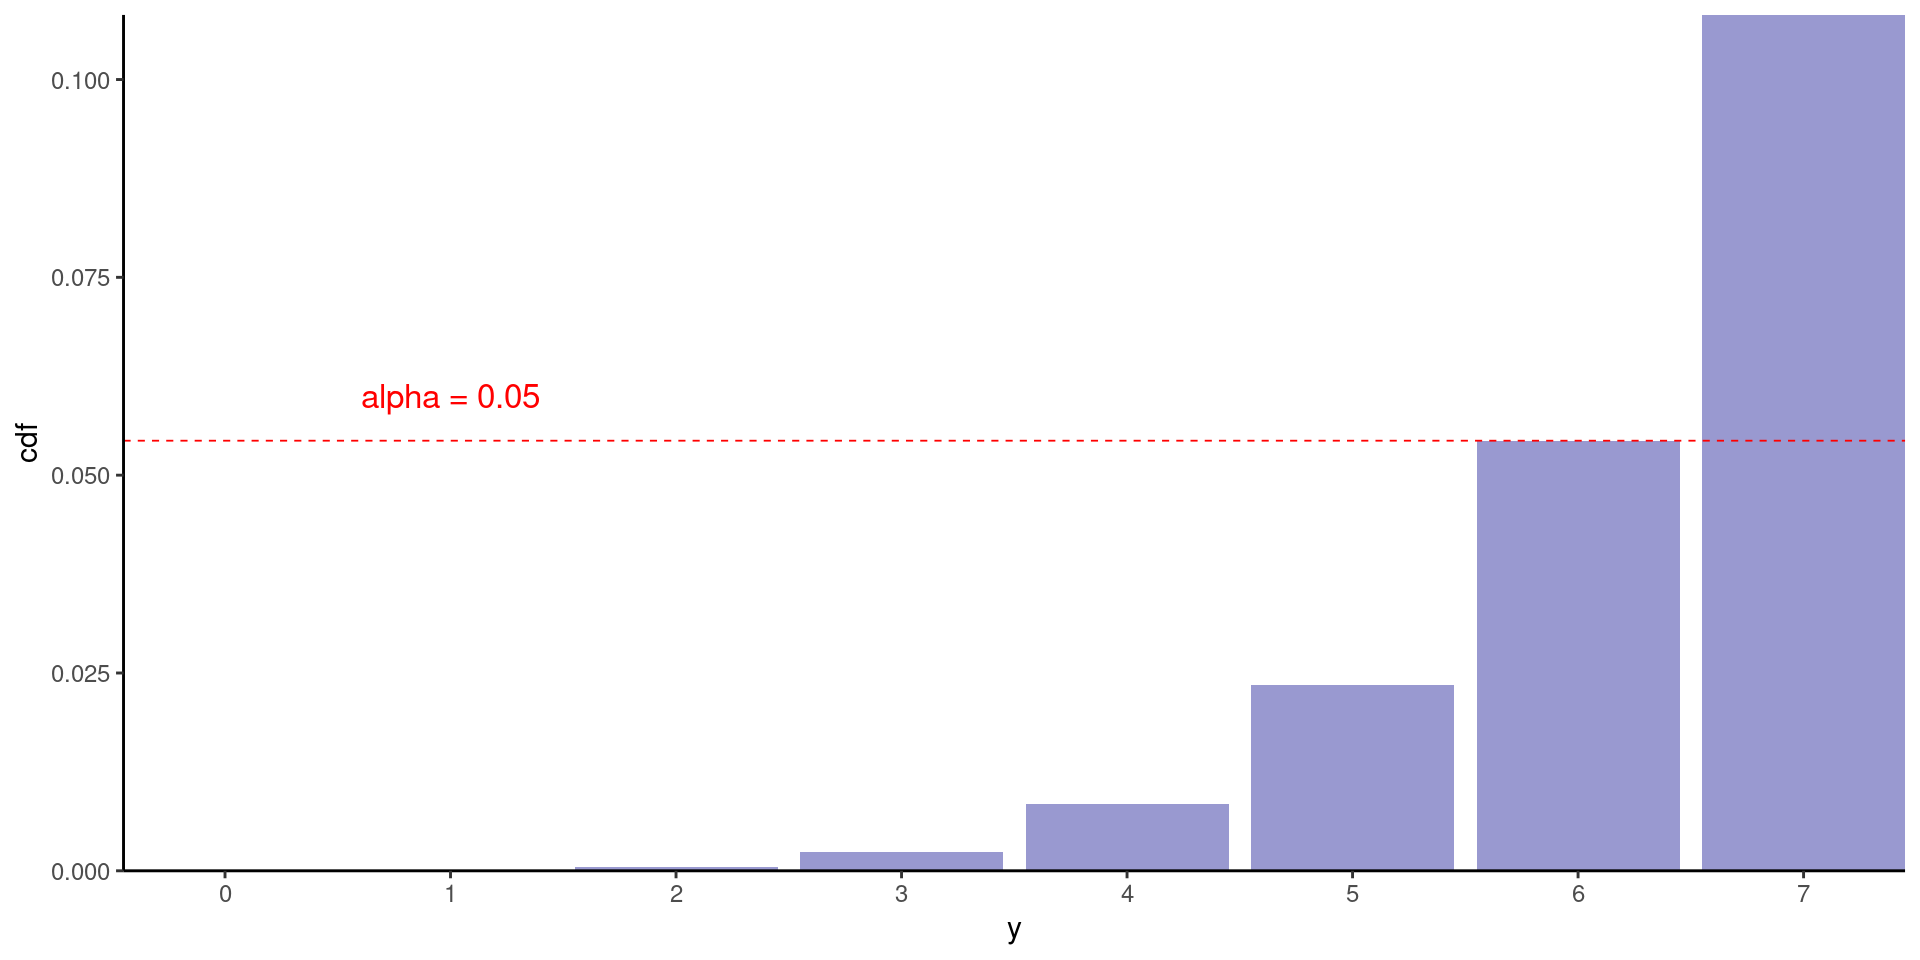

In [19]:
p_value_f <- pbinom(q = y, size = n, prob = 0.15)
cutoff_f <- qbinom(p = 0.05, size = n, prob = 0.15)

yy <- seq(0, n, len = n+1)

df_f <- data.frame(num = yy, cdf = pbinom(q = yy, size = n, prob = 0.15))


ggplot(data=df_f[1:8,], aes(x=num, y=cdf)) +
geom_bar(stat="identity", fill="darkblue", alpha = 0.4) +
geom_hline(aes(yintercept = p_value_f), size = 0.5, color = 'red', linetype = 'dashed') +
annotate(geom="text", x=1, y=0.06, label="alpha = 0.05",
              color="red", size=7) +
scale_x_continuous(name = 'y', expand = c(0,0), breaks = 0:8) +
scale_y_continuous(name = 'cdf', expand = c(0,0)) +
theme_classic(base_size=18)

In [20]:
cat('p-value =', p_value_f, '\n')

if (p_value_f < 0.05) {
    cat('The Null Hypothesis is rejected')
} else {
    cat('The Null Hypothesis is accepted')
}

p-value = 0.0543533 
The Null Hypothesis is accepted

Formally the p-value is greater than 0.05, so that Null Hypothesis is accepeted. However, the p-value is very close to 0.05. In fact, if we want to round the estimated p-value to a value with 2 decimal places, the Null Hypothesis will be rejected.

In such case, it cannot be said that we are sure that Null Hypothesis is true.

# Exercise 3

### - given the problem of the lightouse discussed last week, study the case in which both the position along the shore (α) and the distance out at sea ($\beta$) are unknown

### Problem:

### A lighthouse is located at a position α along the shore and at a distance β out at sea. It emits a series of short highly collimated flashes at random intervals and at random angles. We detect the pulses on the coast using photo-detectors; they record only the position xk of the flash arrival on the coast, but not the angle of emission. N flashes have been recorded at positions {xk}. We want to estimate the position of the lighthouse

We assume uniform prior for both $\alpha$ and $\beta$ in a given range.

$x = \beta tan\theta + \alpha \rightarrow |\frac{dx}{d\theta}| = \frac{\beta^2 + (x-\alpha)^2}{\beta}$.

Then $P(x|\alpha, \beta) = P(\theta|\alpha, \beta) |\frac{dx}{d\theta}| = \frac{1}{\pi}\frac{\beta^2 + (x-\alpha)^2}{\beta}$.


Function for the logarithm of the posterior:

In [21]:
p_log_like <- function(a, b, data) {
    log_L <- 0
    for (x in data) {
        log_L <- log_L - log(b^2 + (x-a)^2) + log(b)
    }
    return(log_L)
}

Number of flashes:

In [22]:
n = c(1, 2, 5, 10, 20, 50, 100, 300)

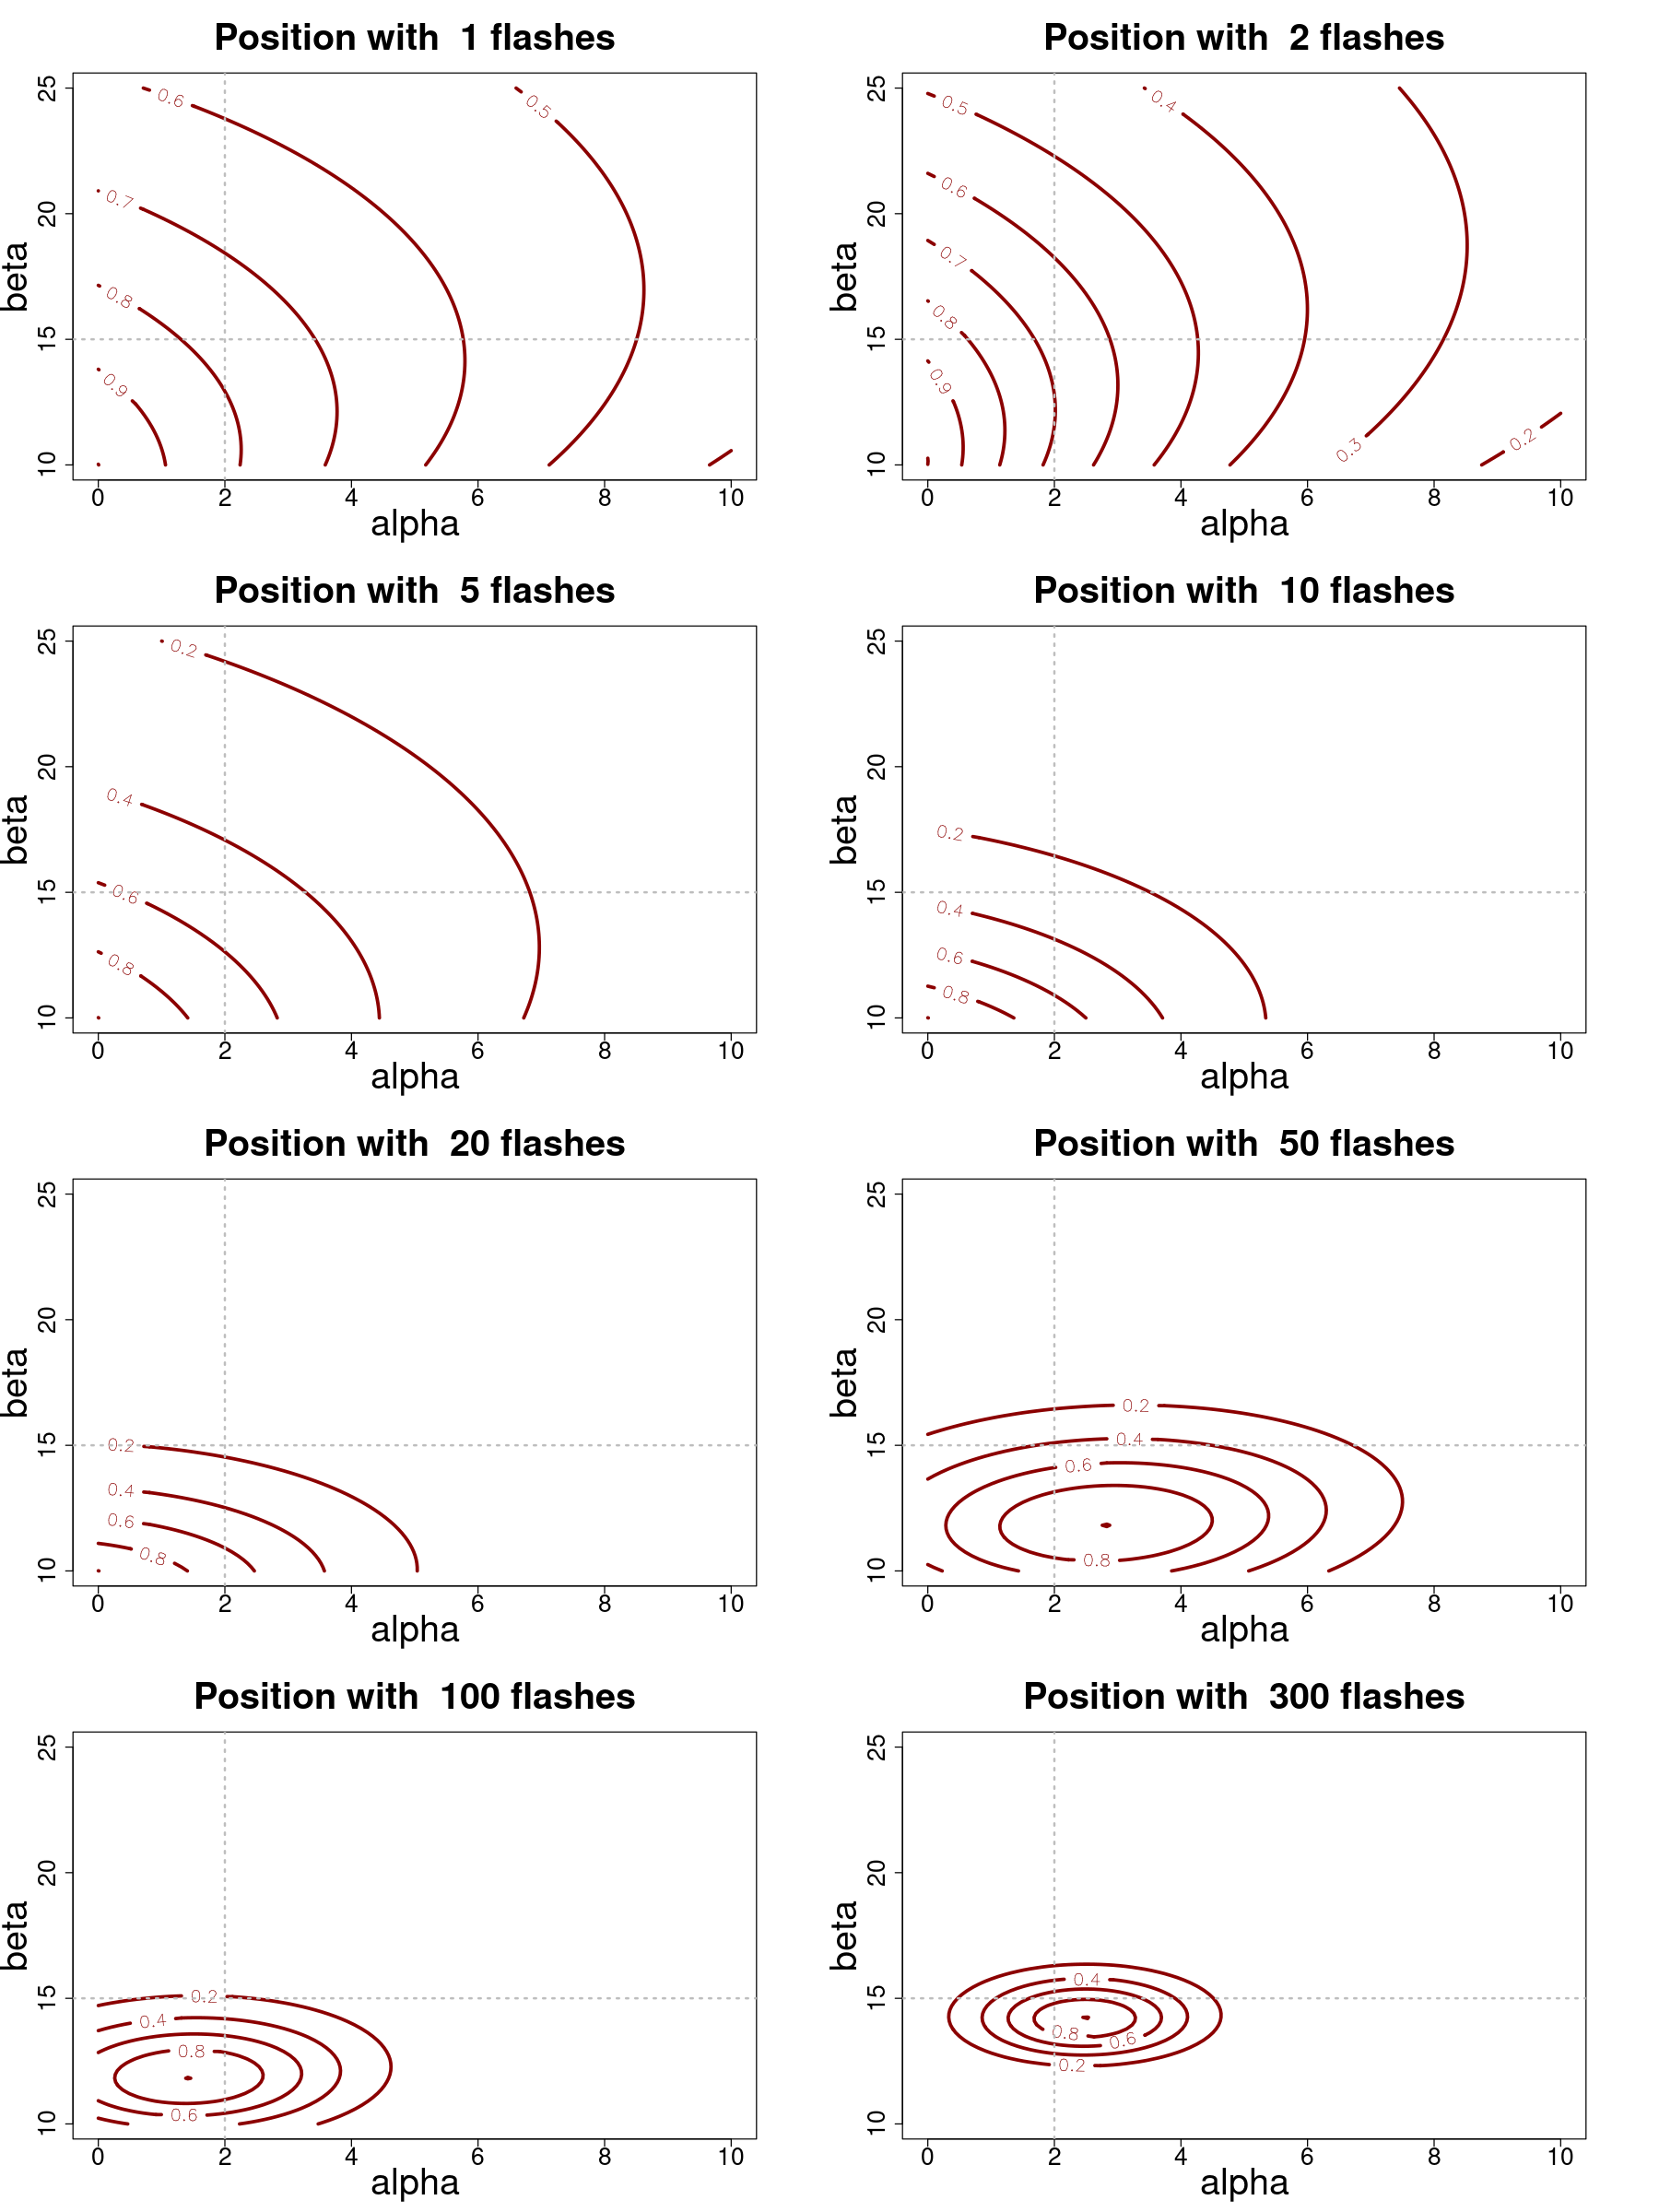

In [23]:
alpha_true <- 2
beta_true <- 15

step <- 0.01
alpha_min <- 0; alpha_max <- 10
beta_min <- 10; beta_max <- 25

alpha <- seq(alpha_min, alpha_max, length.out = 1/step)
beta <- seq(beta_min, beta_max, length.out = 1/step)


generation <- function(alpha, beta, alpha_true, beta_true, num){
    set.seed(100)

    z <- matrix(data=NA, nrow=length(alpha), ncol=length(beta))
    theta_k <- runif(num, -pi/2, pi/2)
    xk <- beta_true*tan(theta_k) + alpha_true 
    
    for(i in 1:length(alpha)) {
        
        for(j in 1:length(beta)) {
            
            z[i,j] <- p_log_like(alpha[i], beta[j], xk)
            
            }
        }
    
    z <- z - max(z)
    
    return(z)
}

par(mfrow=c(4, 2), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(5,5,5,5))
options(repr.plot.width=15,repr.plot.height=20)

for (num in n){
    z <- generation(alpha, beta, alpha_true, beta_true, num)
    
    contour(alpha, beta, exp(z),  col = "darkred",
            xlab='alpha', ylab='beta',
            nlevels = 6,
            labcex = 1,
            lwd = 3,
            main=paste("Position with ", num, "flashes"))
    abline(v = alpha_true, h = beta_true, col='grey', lty=3, lwd=2)
}    

To plot $P(\alpha|D \beta)$ or $P(\beta|D \alpha)$ we need to marginalize over $\beta$ and $\alpha$ respectively.

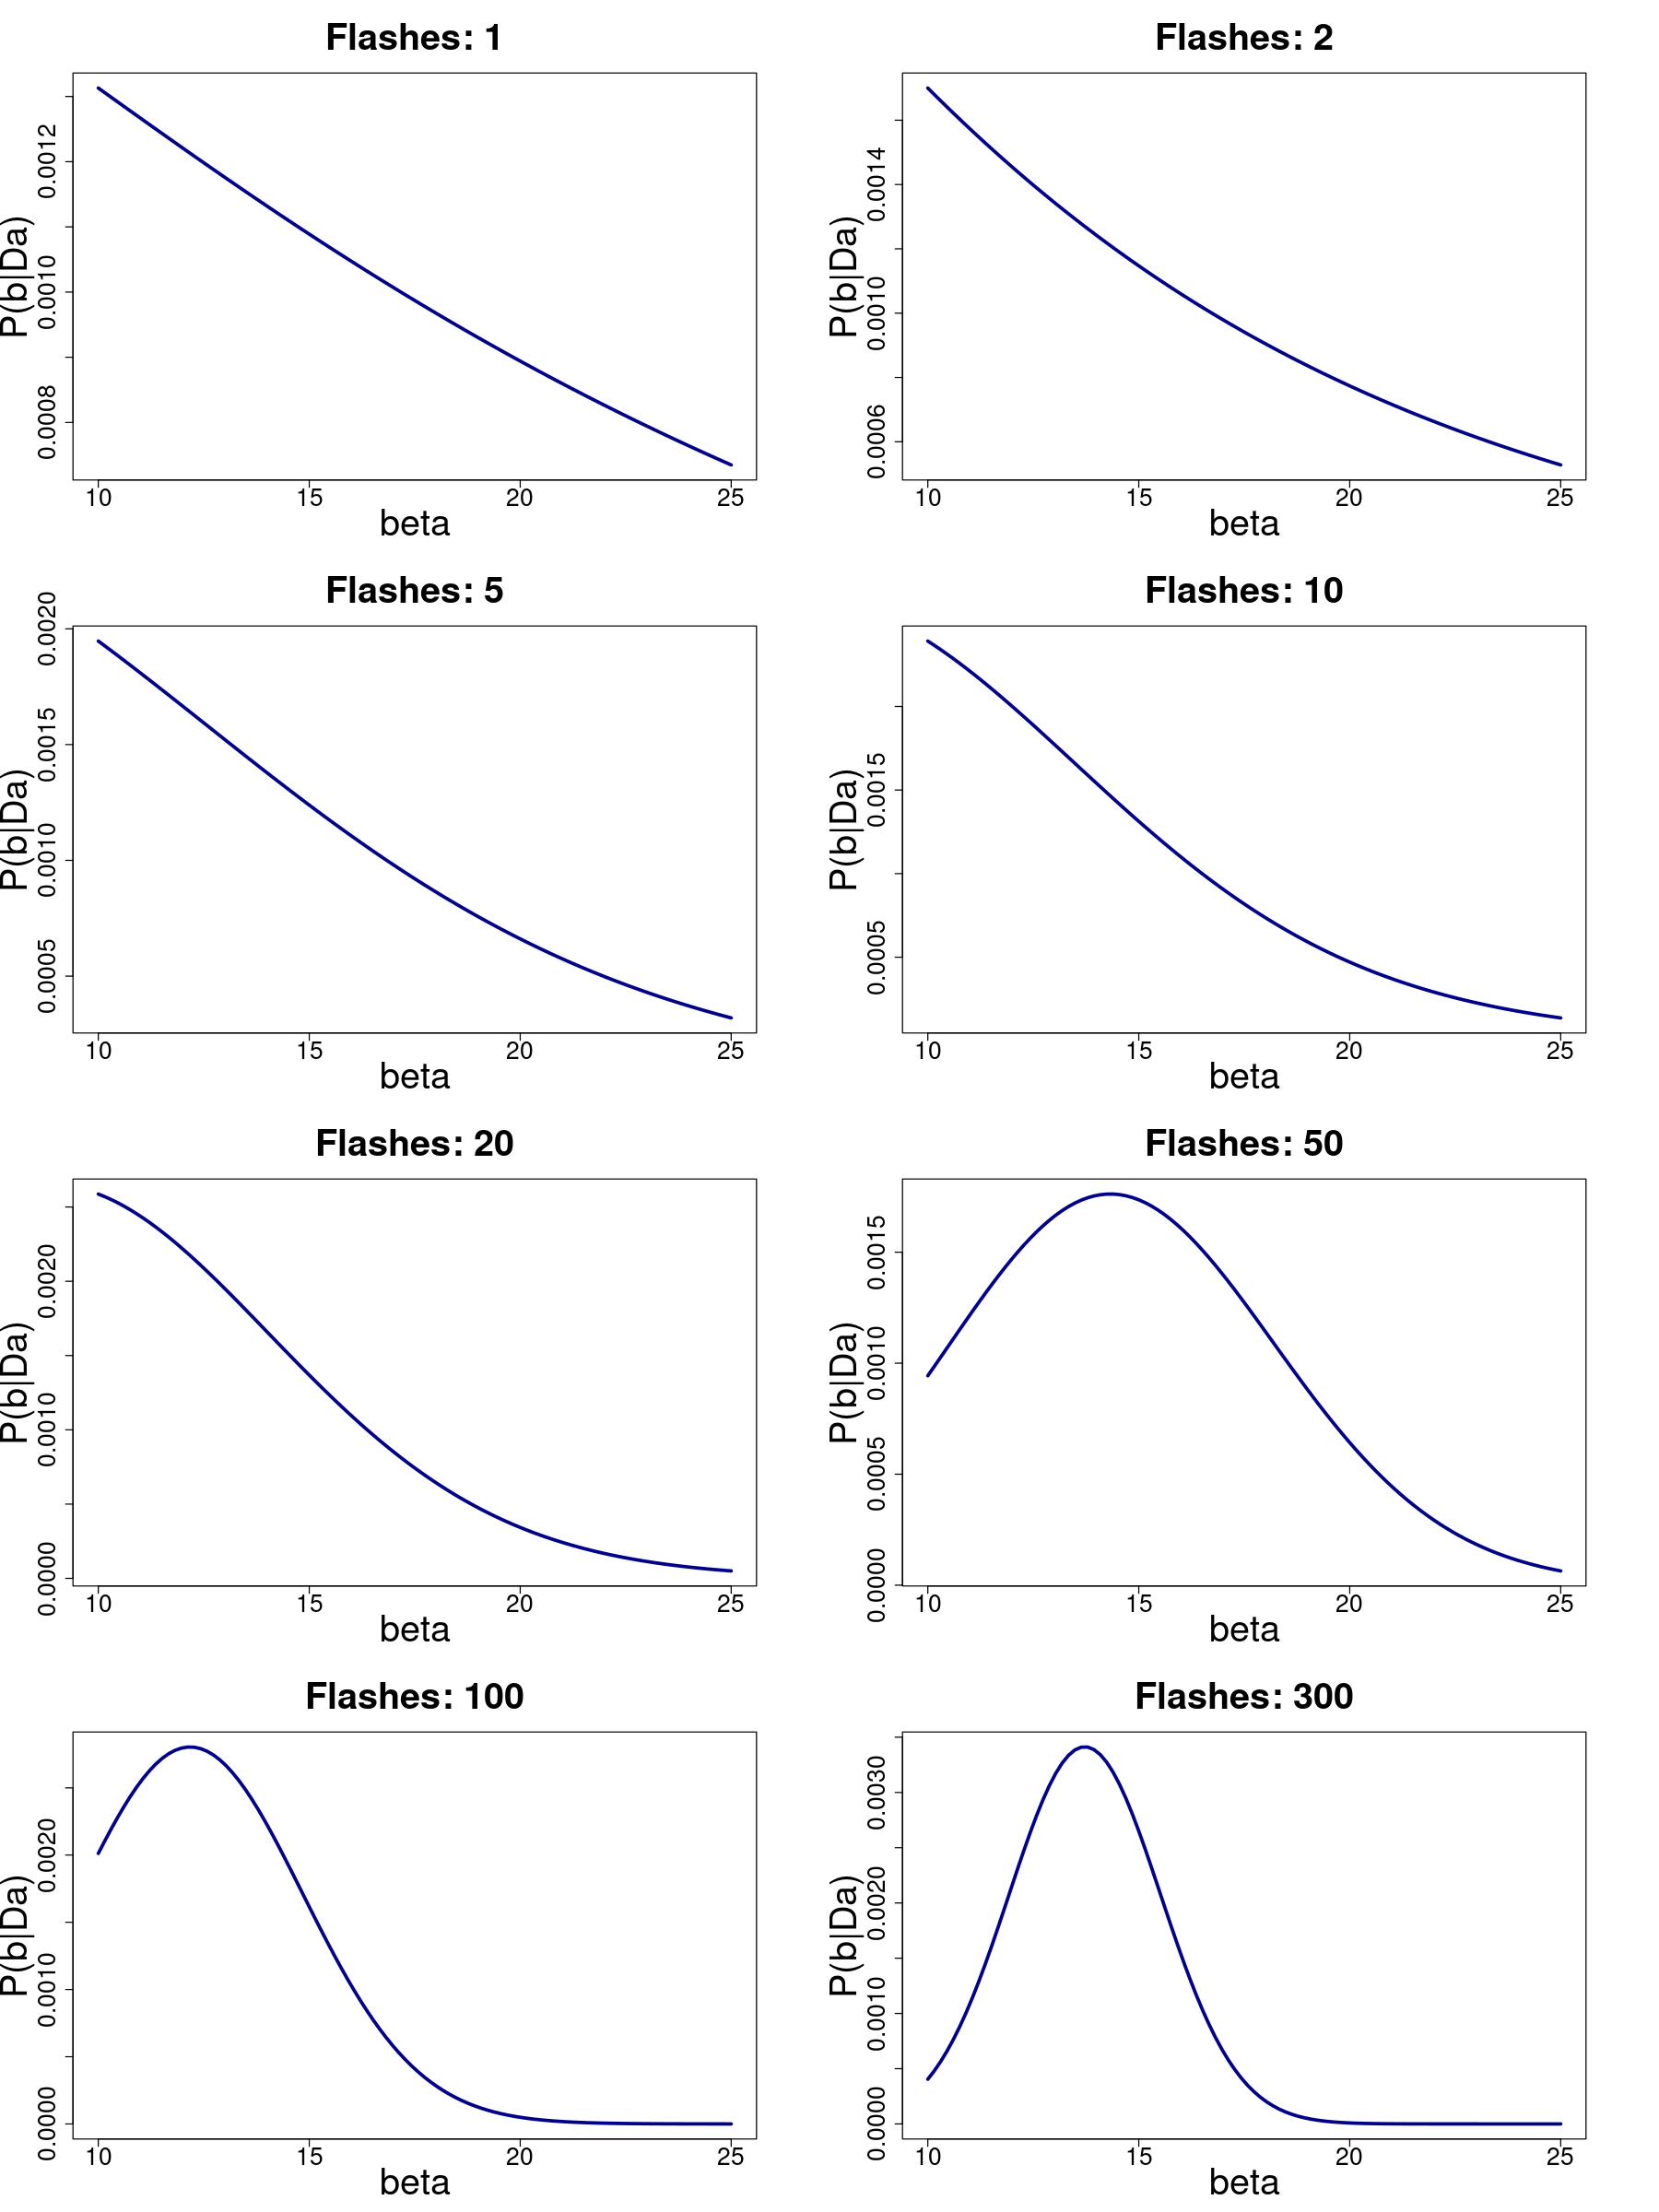

In [24]:
par(mfrow=c(4, 2), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(5,5,5,5))
options(repr.plot.width=15,repr.plot.height=20)

for (num in n){
    z <- generation(alpha, beta, alpha_true, beta_true, num)
    z_marg_alpha <- apply(exp(z), 1, sum) #sum over rows
    z_marg_alpha_normalized <- z_marg_alpha/(sum(z_marg_alpha)*(alpha_max-alpha_min))
    plot(beta, z_marg_alpha_normalized,  col = "darkblue", type='l',
            xlab='beta', ylab='P(b|Da)',
            lwd = 3,
            main=paste("Flashes:", num))
}

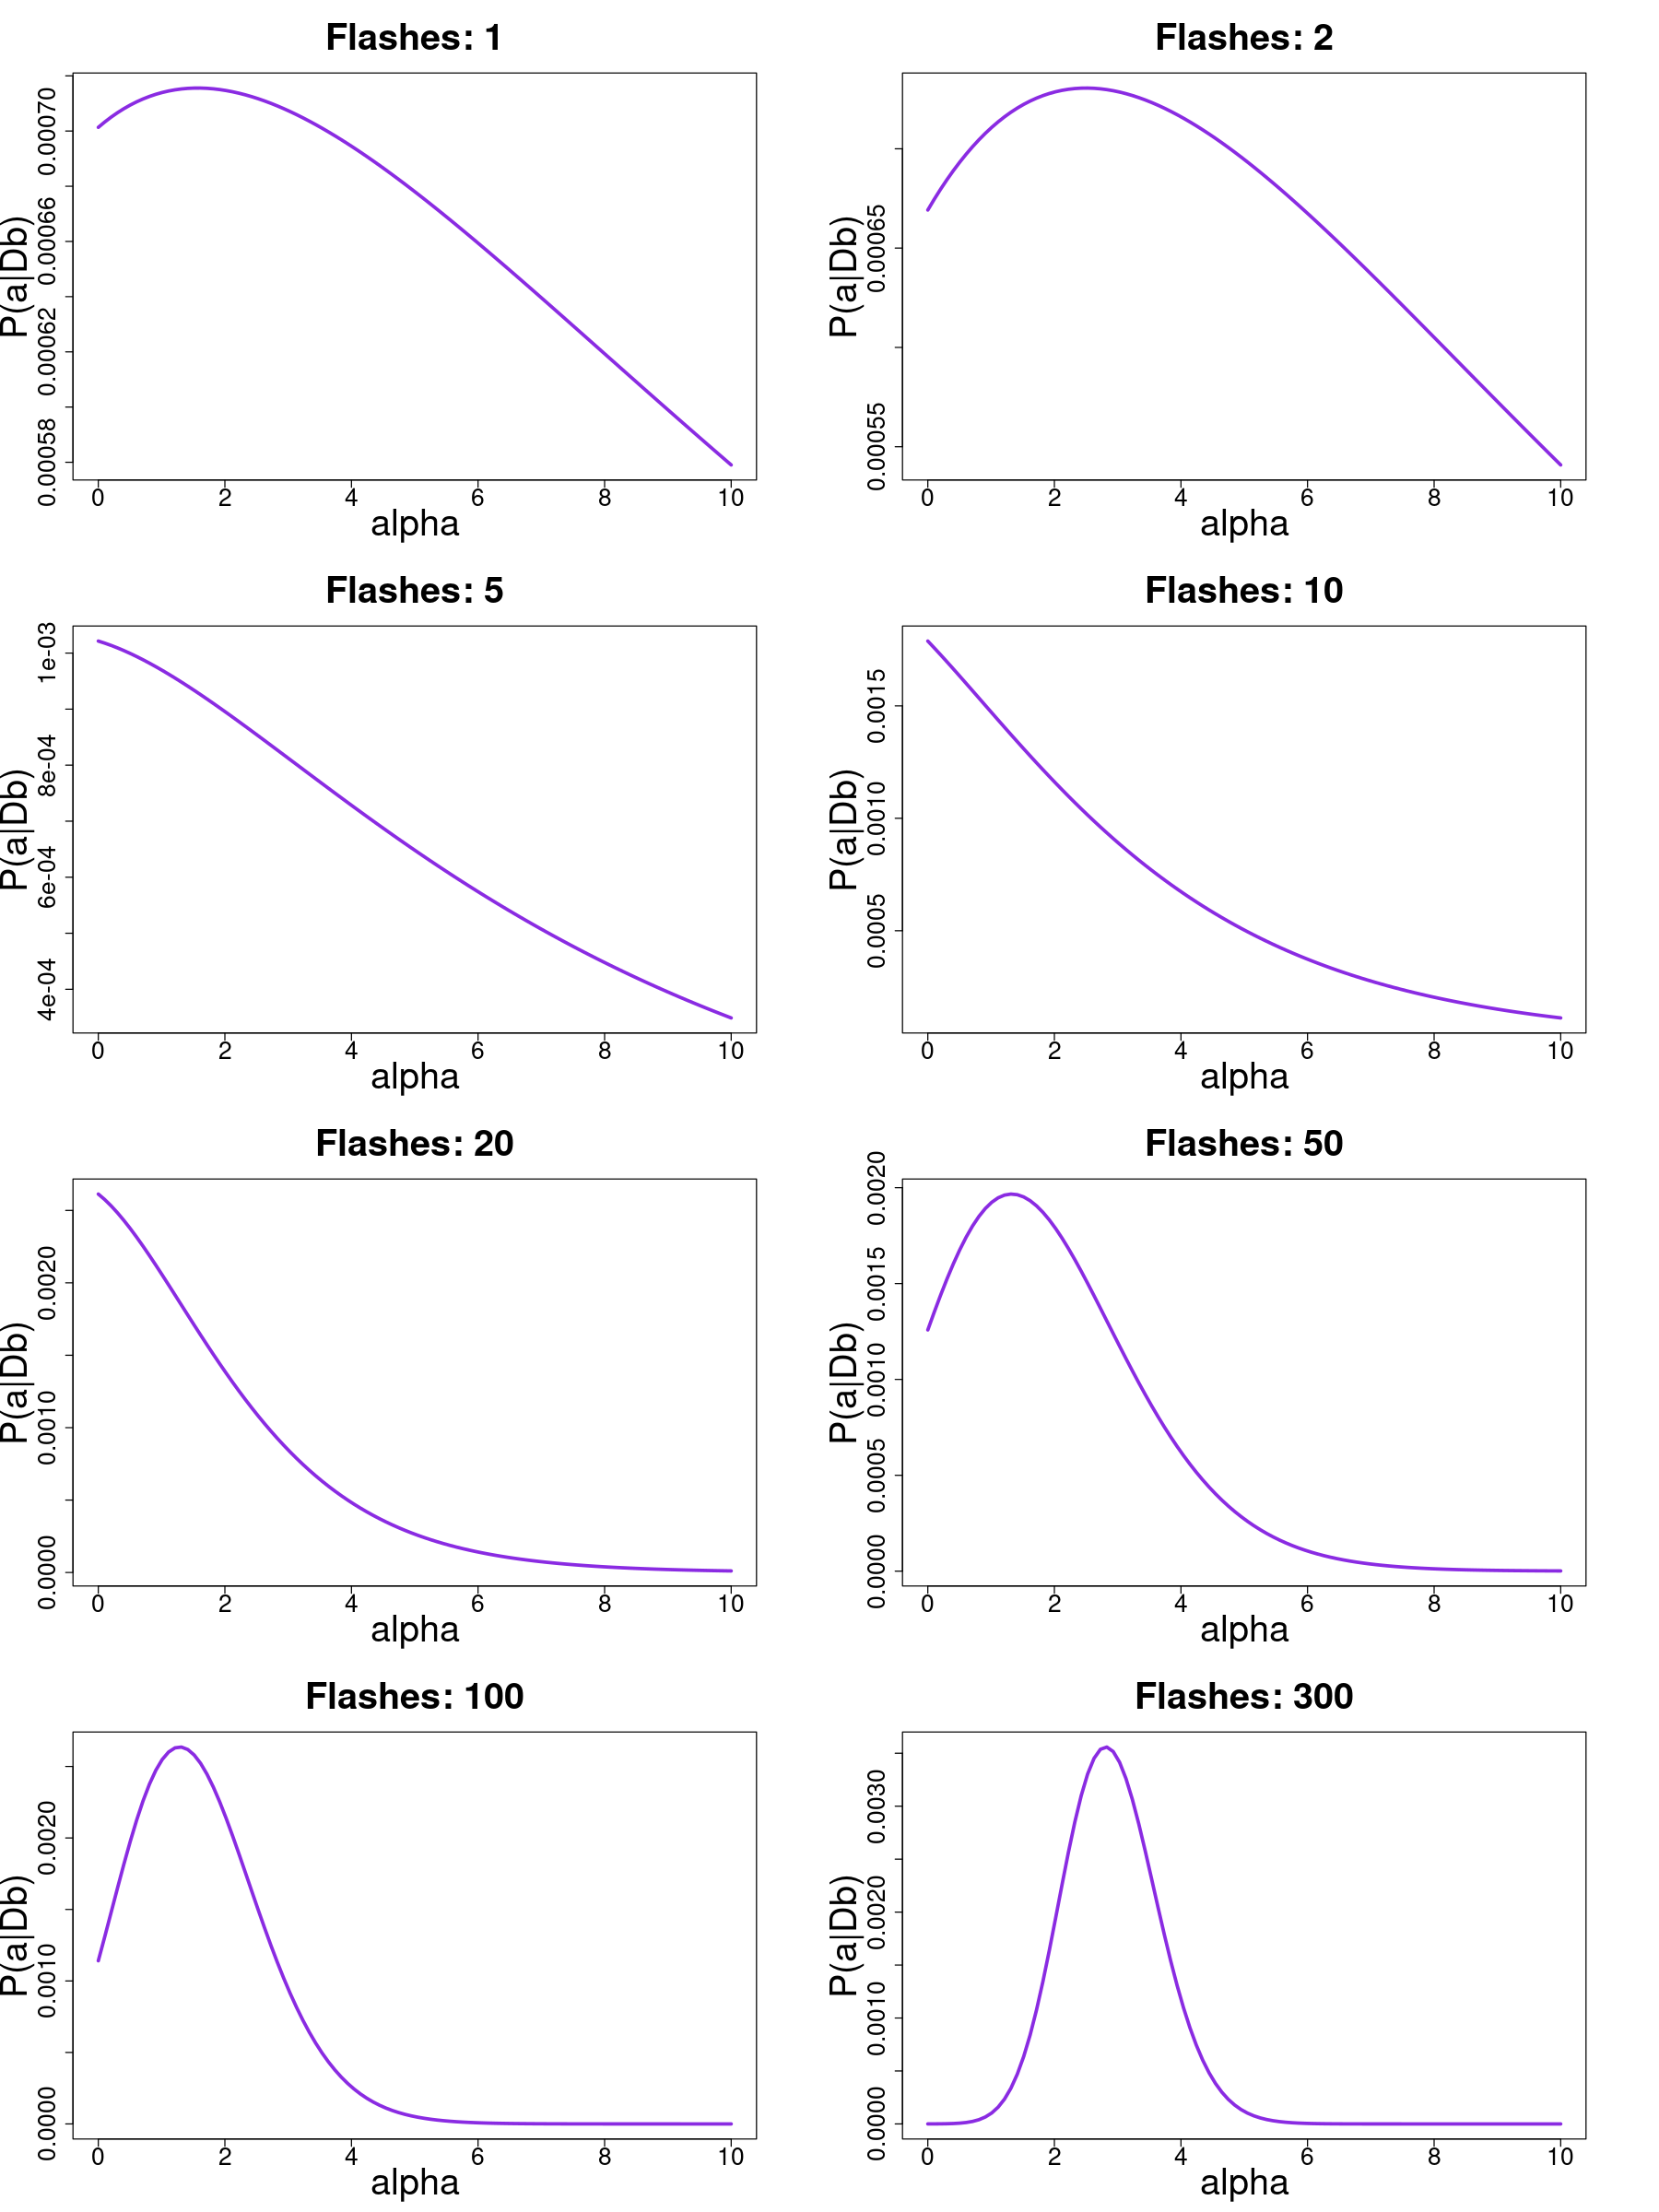

In [25]:
par(mfrow=c(4, 2), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(5,5,5,5))
options(repr.plot.width=15,repr.plot.height=20)

for (num in n){
    z <- generation(alpha, beta, alpha_true, beta_true, num)
    z_marg_beta <- apply(exp(z), 2, sum) #sum over columns
    z_marg_beta_normalized <- z_marg_beta/(sum(z_marg_beta)*(beta_max-beta_min))
    plot(alpha, z_marg_beta_normalized,  col = "blueviolet", type='l',
            xlab='alpha', ylab='P(a|Db)',
            lwd = 3,
            main=paste("Flashes:", num))
}

# Exercise 4

### -  given the Signal over Background example discussed last week, analyze and discuss the following cases:

### a) vary the sampling resolution of used to generate the data, keeping the same sampling range: xdat <- seq(from=-7*w, to=7*w, by=0.5*w)

### - change the resolution w = {0.1, 0.25, 1, 2, 3}

### - check the effect on the results

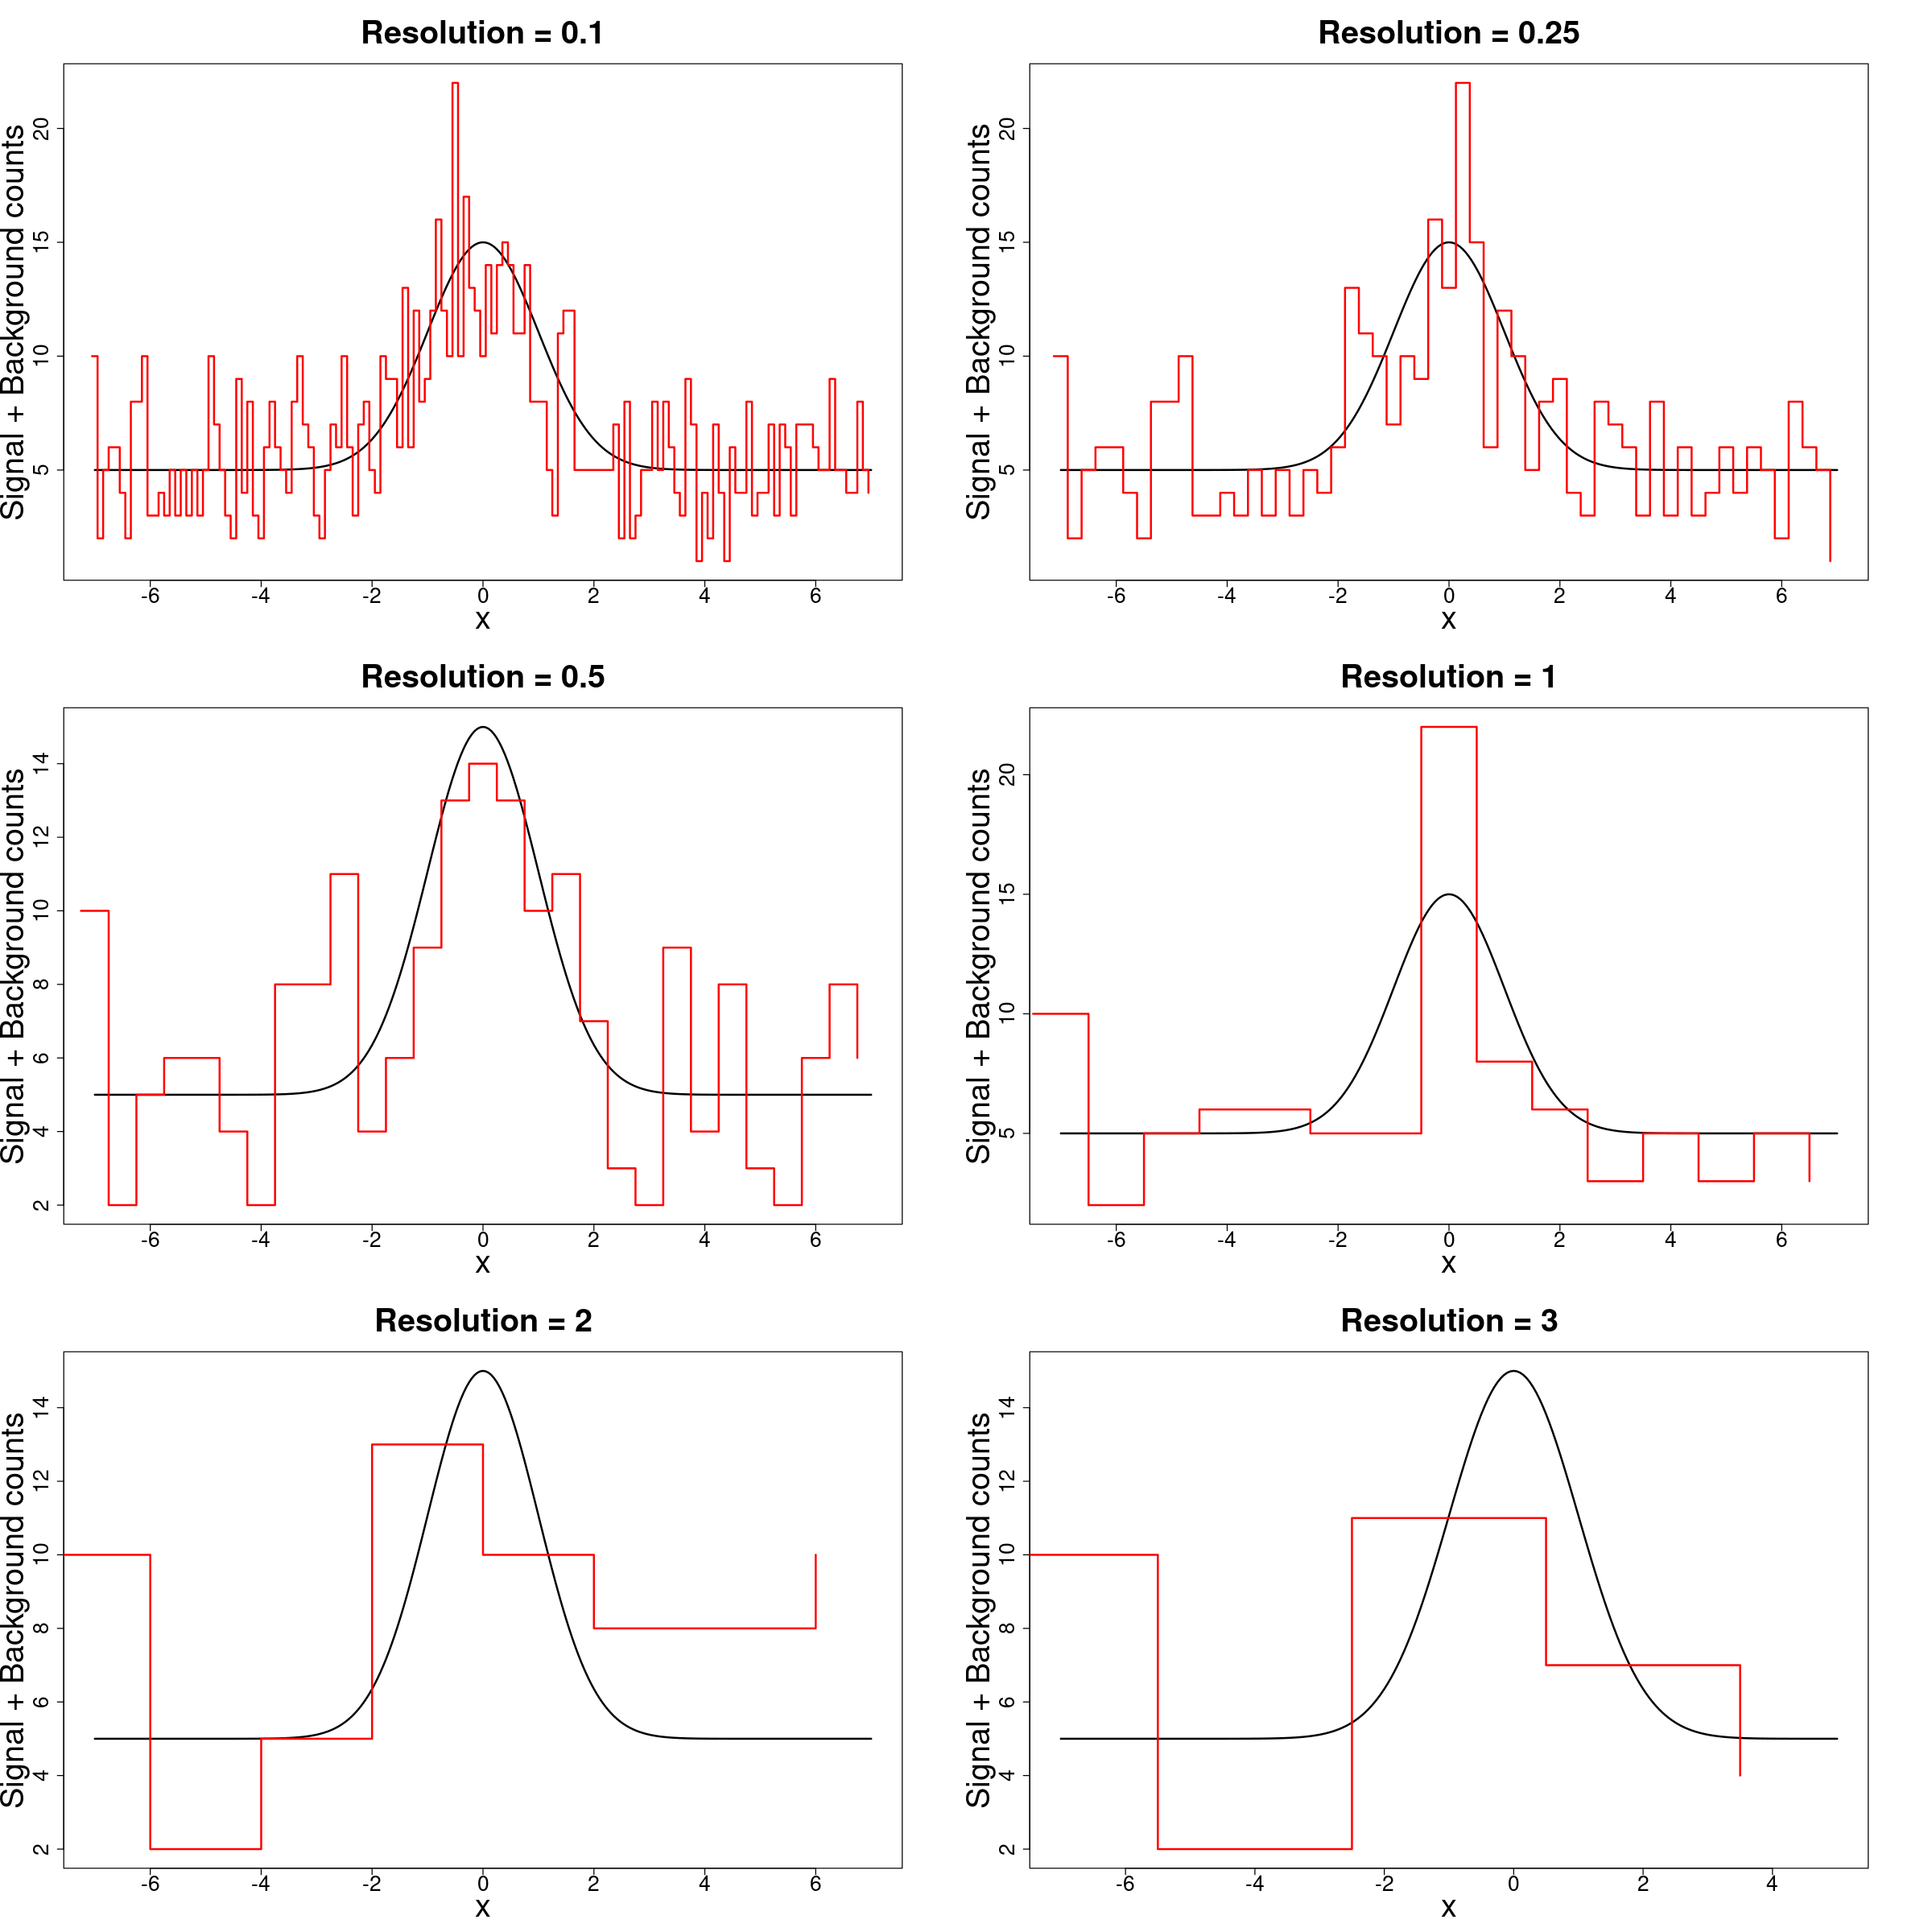

In [26]:
# - Generative model
signal <- function (x, a, b, x0, w, t) {
t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}


# Define model parameters
x0 <- 0 # Signal peak
w <- 1 # Signal width
A_true <- 2 # Signal amplitude
B_true <- 1 # Background amplitude
Delta_t <- 5 # Exposure time

res <- c(0.1, 0.25, 0.5, 1, 2, 3)


par(mfrow=c(3, 2), cex.main = 3, cex.lab = 3, cex.axis = 2, mar=c(5,5,5,5))
options(repr.plot.width=20, repr.plot.height=20)



for (i in res) {
    set.seed(205)

    xdat <- seq(from=-7*w, to=7*w, by=w*i) #resolution is changed
    s_true <- signal(xdat, A_true, B_true, x0, w, Delta_t)
    ddat <- rpois(length(s_true), s_true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot, A_true, B_true, x0, w, Delta_t)
    plot(xplot, splot, xlab="x", ylab="Signal + Background counts",
         main=paste('Resolution =', i), type='l', col='black', lwd=2,
         xlim=range(xplot), ylim=range(c(splot, ddat)))
    par(new=TRUE)
    xdat_off <- xdat - i/2
    lines(xdat_off, ddat, type='s', col='red', lwd=2)
    
}

Posterior function:

In [27]:
log_post <- function (d, x, a, b, x0, w, t) {
    
    if(a<0 || b <0) { return (-Inf )} # the effect of the prior
    sum(dpois(d, lambda = signal(x, a, b, x0, w, t), log=TRUE))
    
}

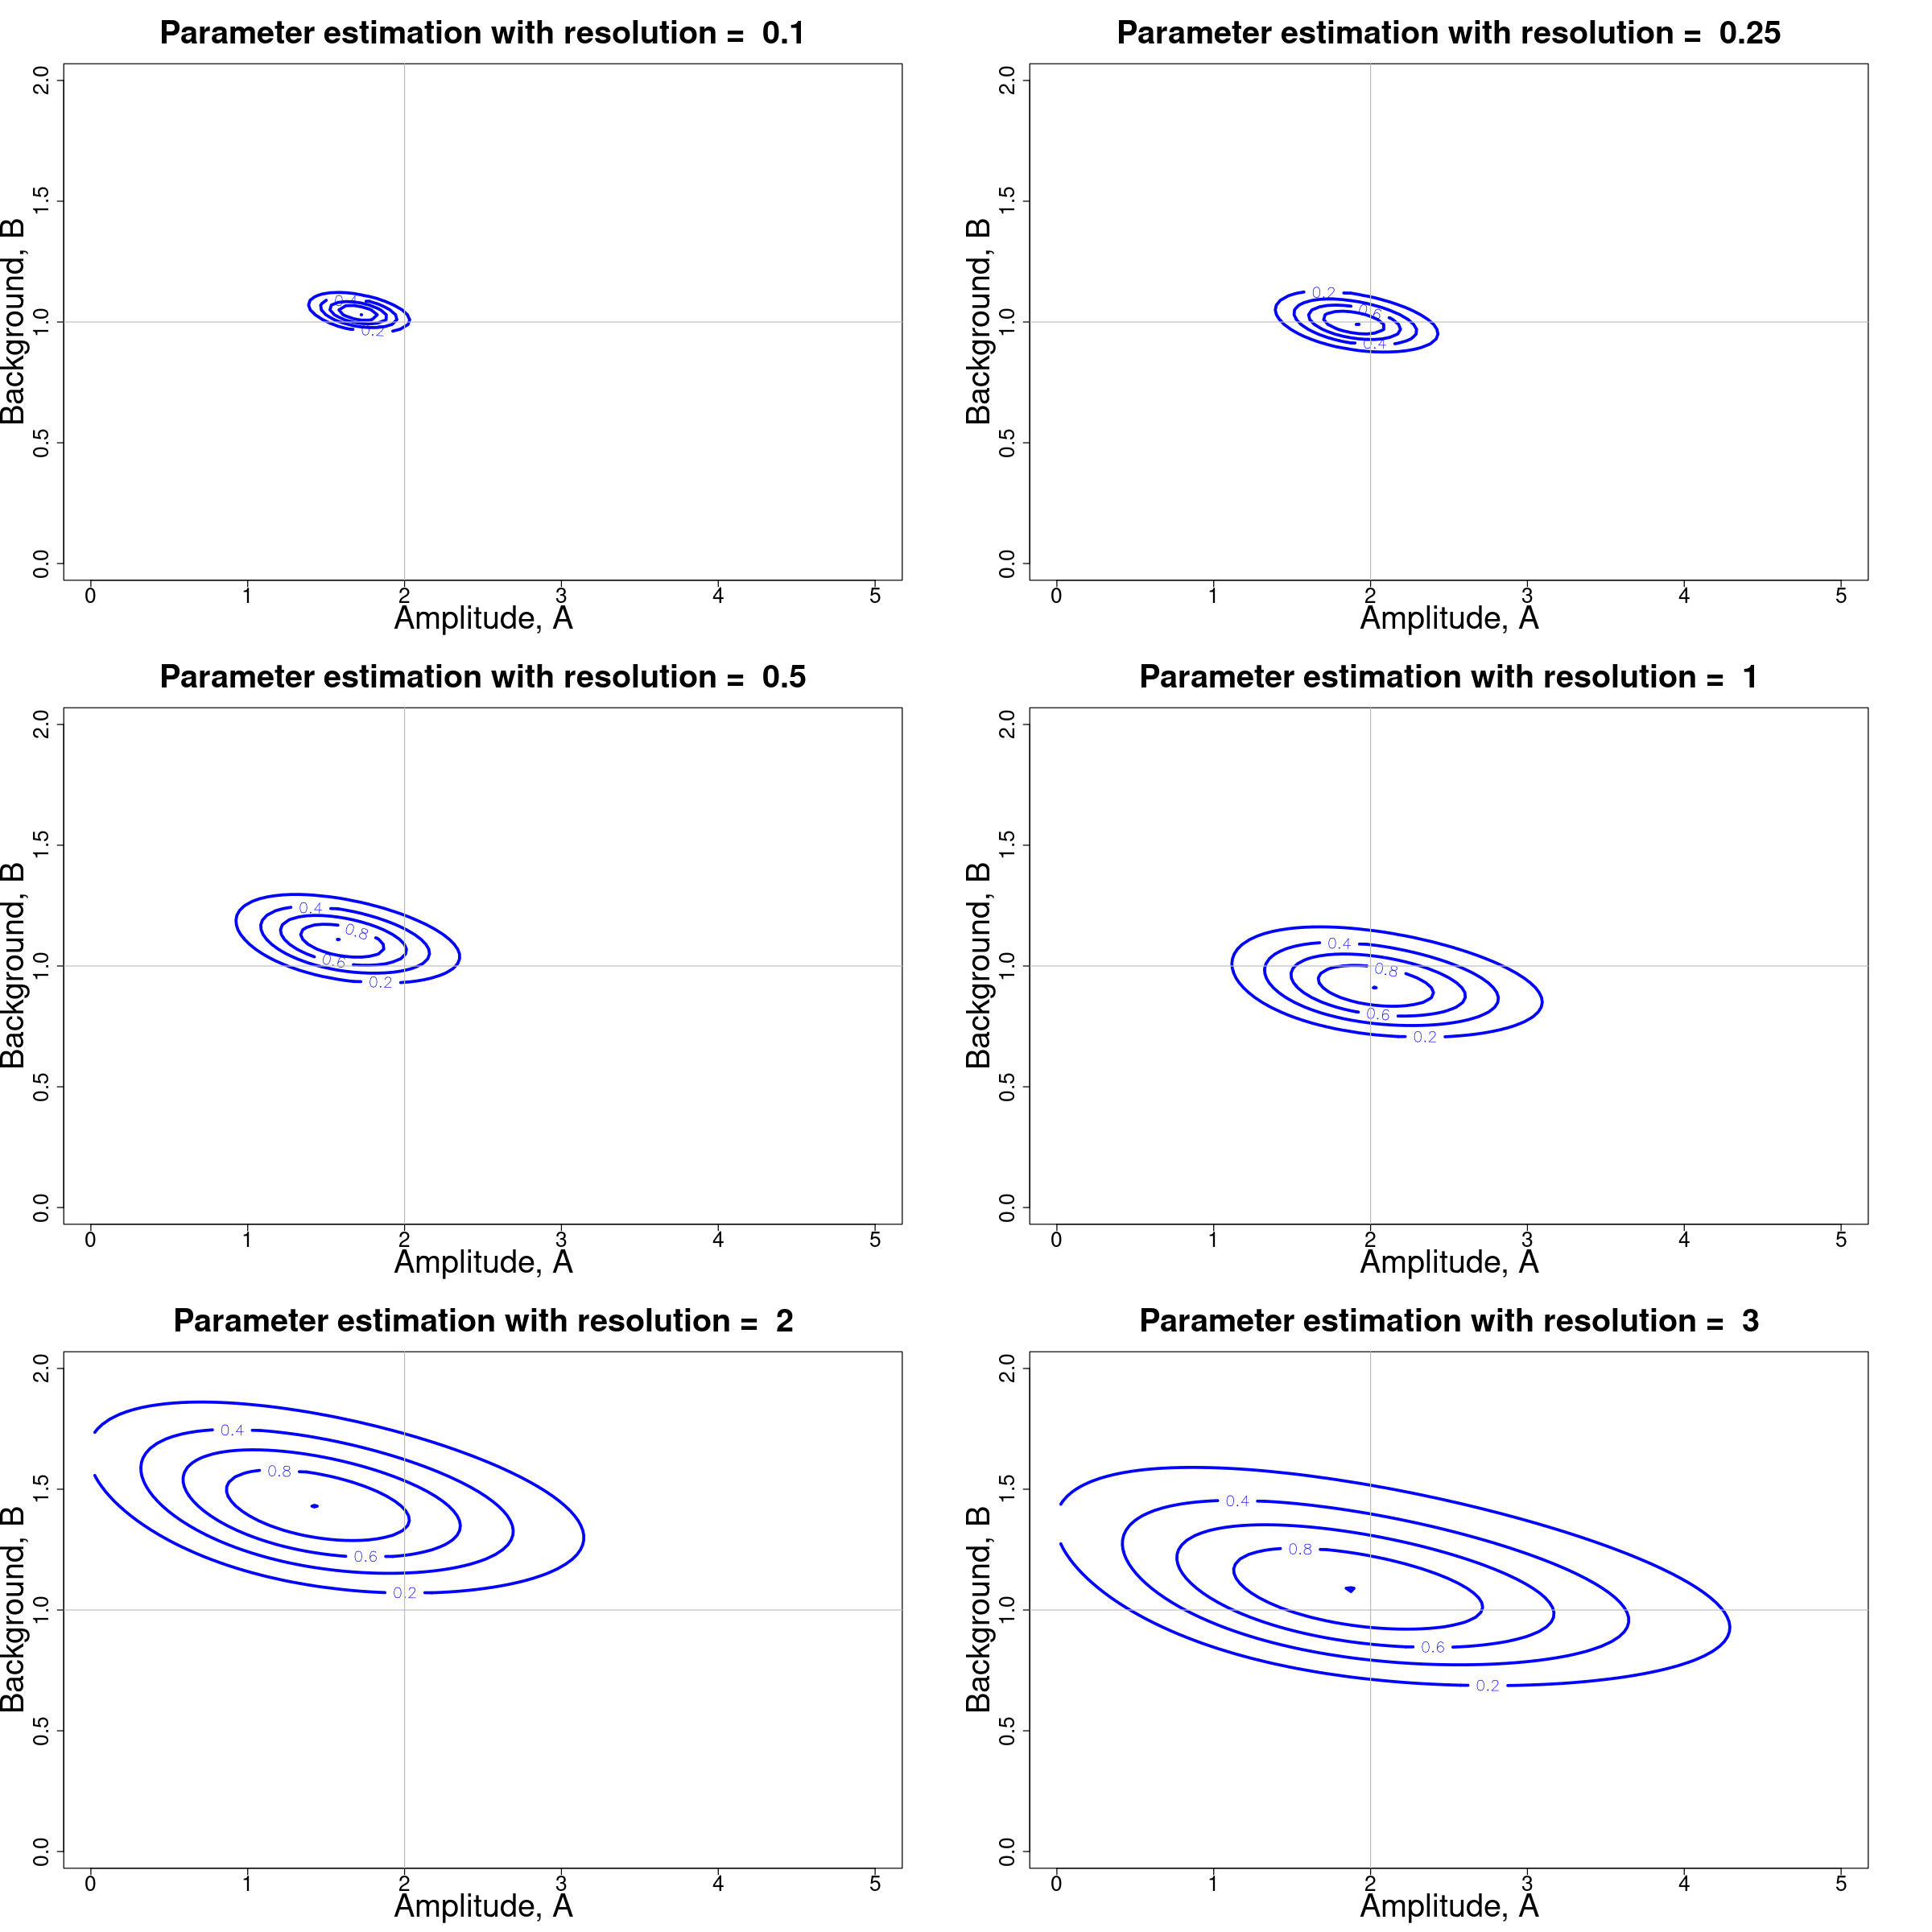

In [28]:
Alim <- c(0, 5)
Blim <- c(0, 2)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_A <- diff(Alim)/Nsamp
delta_B <- diff(Blim)/Nsamp
A <- Alim[1] + diff(Alim)*uniGrid
B <- Blim[1] + diff(Blim)*uniGrid


par(mfrow=c(3, 2), cex.main = 3, cex.lab = 3, cex.axis = 2, mar=c(5,5,5,5))
options(repr.plot.width=20,repr.plot.height=20)


for (i in res){
    set.seed(205)
        
    xdat <- seq(from=-7*w, to=7*w, by=i*w)
    s_true <- signal(xdat, A_true, B_true, x0, w, Delta_t)
    ddat <- rpois(length(s_true), s_true)
    
    z <- matrix(data=NA, nrow=length(A), ncol=length(B))
    
    
    for(j in 1:length(A)) {
        
        for(k in 1:length(B)) {
            
            z[j,k] <- log_post(ddat, xdat, A[j], B[k], x0, w, Delta_t)
            
            }
        }

    
    z <- z - max(z)
    
    contour(A, B, exp(z),  col = "blue",
            lwd = 3,
            nlevels = 5,
            labcex = 1,
            xlab='Amplitude, A', ylab='Background, B',
            main=paste("Parameter estimation with resolution = ", i))
    abline(v = A_true, h = B_true, col="grey")
}

### b) change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)

### - check the effect on the results

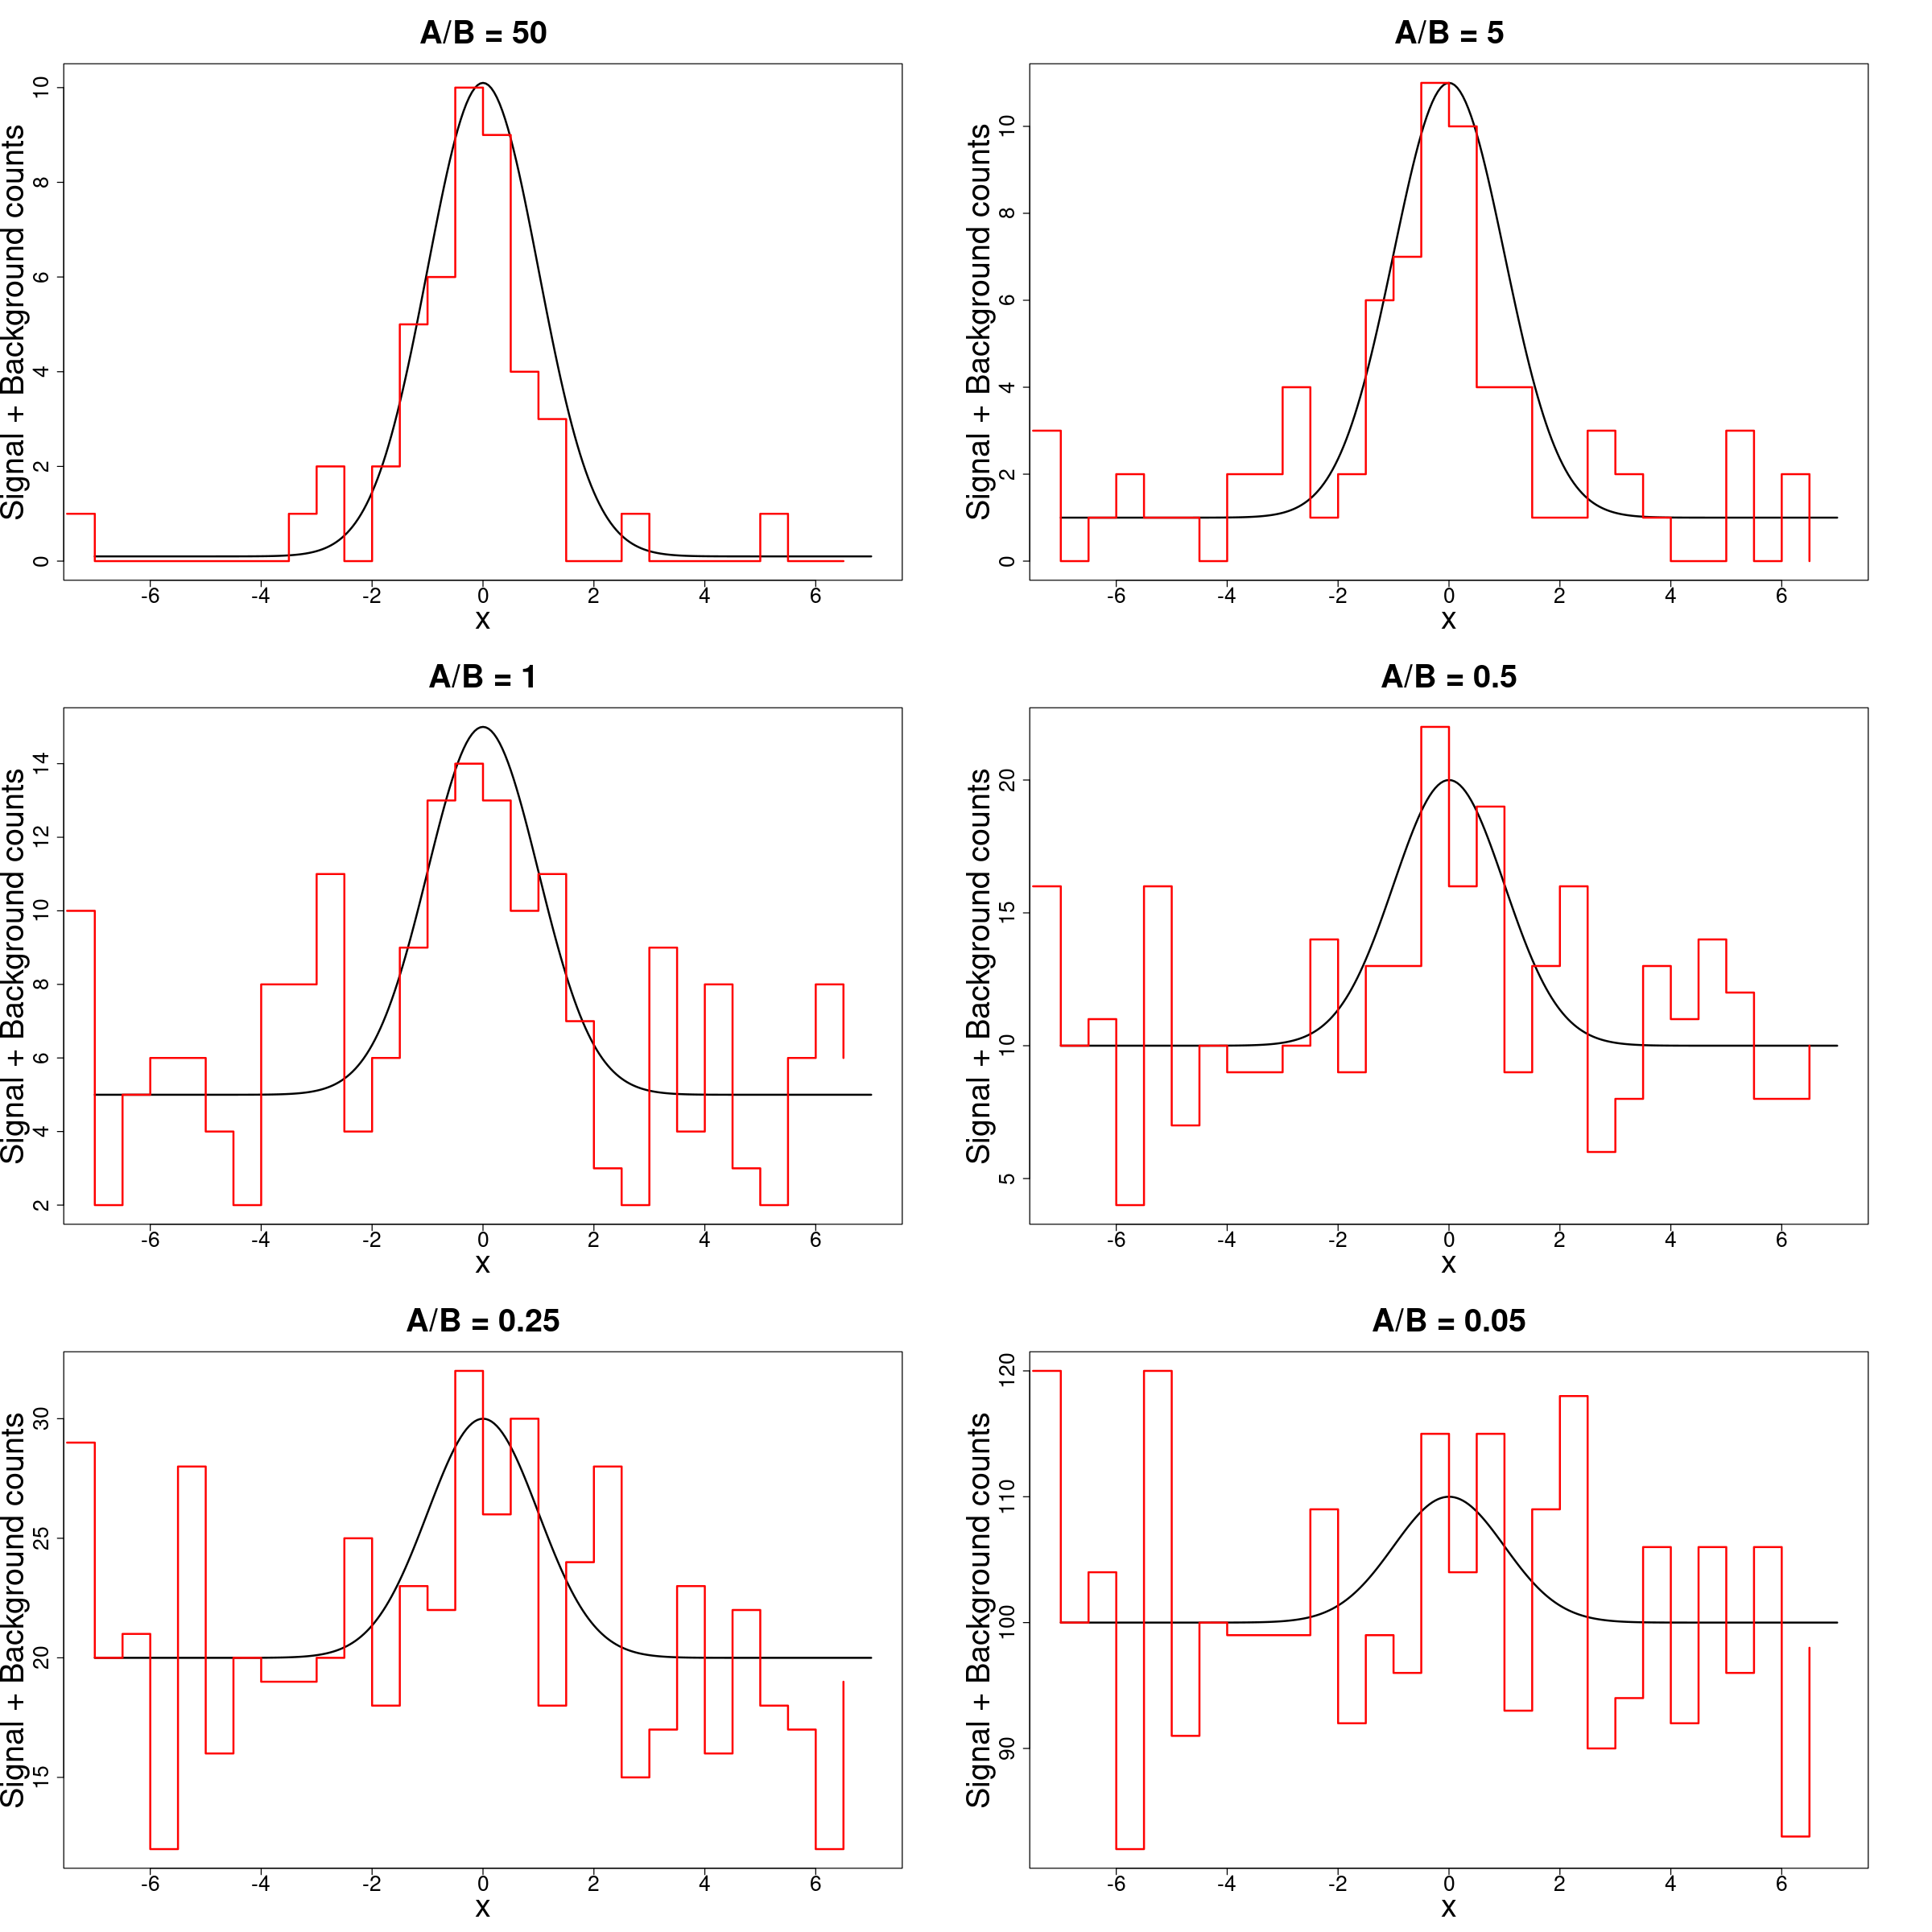

In [29]:
# Define model parameters
x0 <- 0 # Signal peak
w <- 1 # Signal width
A_true <- 2 # Signal amplitude
B_true <- A_true/c(100, 10, 2, 1, 0.5, 0.1) # Background amplitude
Delta_t <- 5 # Exposure time



par(mfrow=c(3, 2), cex.main = 3, cex.lab = 3, cex.axis = 2, mar=c(5,5,5,5))
options(repr.plot.width=20, repr.plot.height=20)



for (b in B_true) {
    set.seed(205)

    xdat <- seq(from=-7*w, to=7*w, by=0.5*w) #resolution 0.5
    s_true <- signal(xdat, A_true, b, x0, w, Delta_t)
    ddat <- rpois(length(s_true), s_true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot, A_true, b, x0, w, Delta_t)
    plot(xplot, splot, xlab="x", ylab="Signal + Background counts",
         main=paste('A/B =', 1/b), type='l', col='black', lwd=2,
         xlim=range(xplot), ylim=range(c(splot, ddat)))
    par(new=TRUE)
    xdat_off <- xdat - w/2
    lines(xdat_off, ddat, type='s', col='red', lwd=2)
    
}

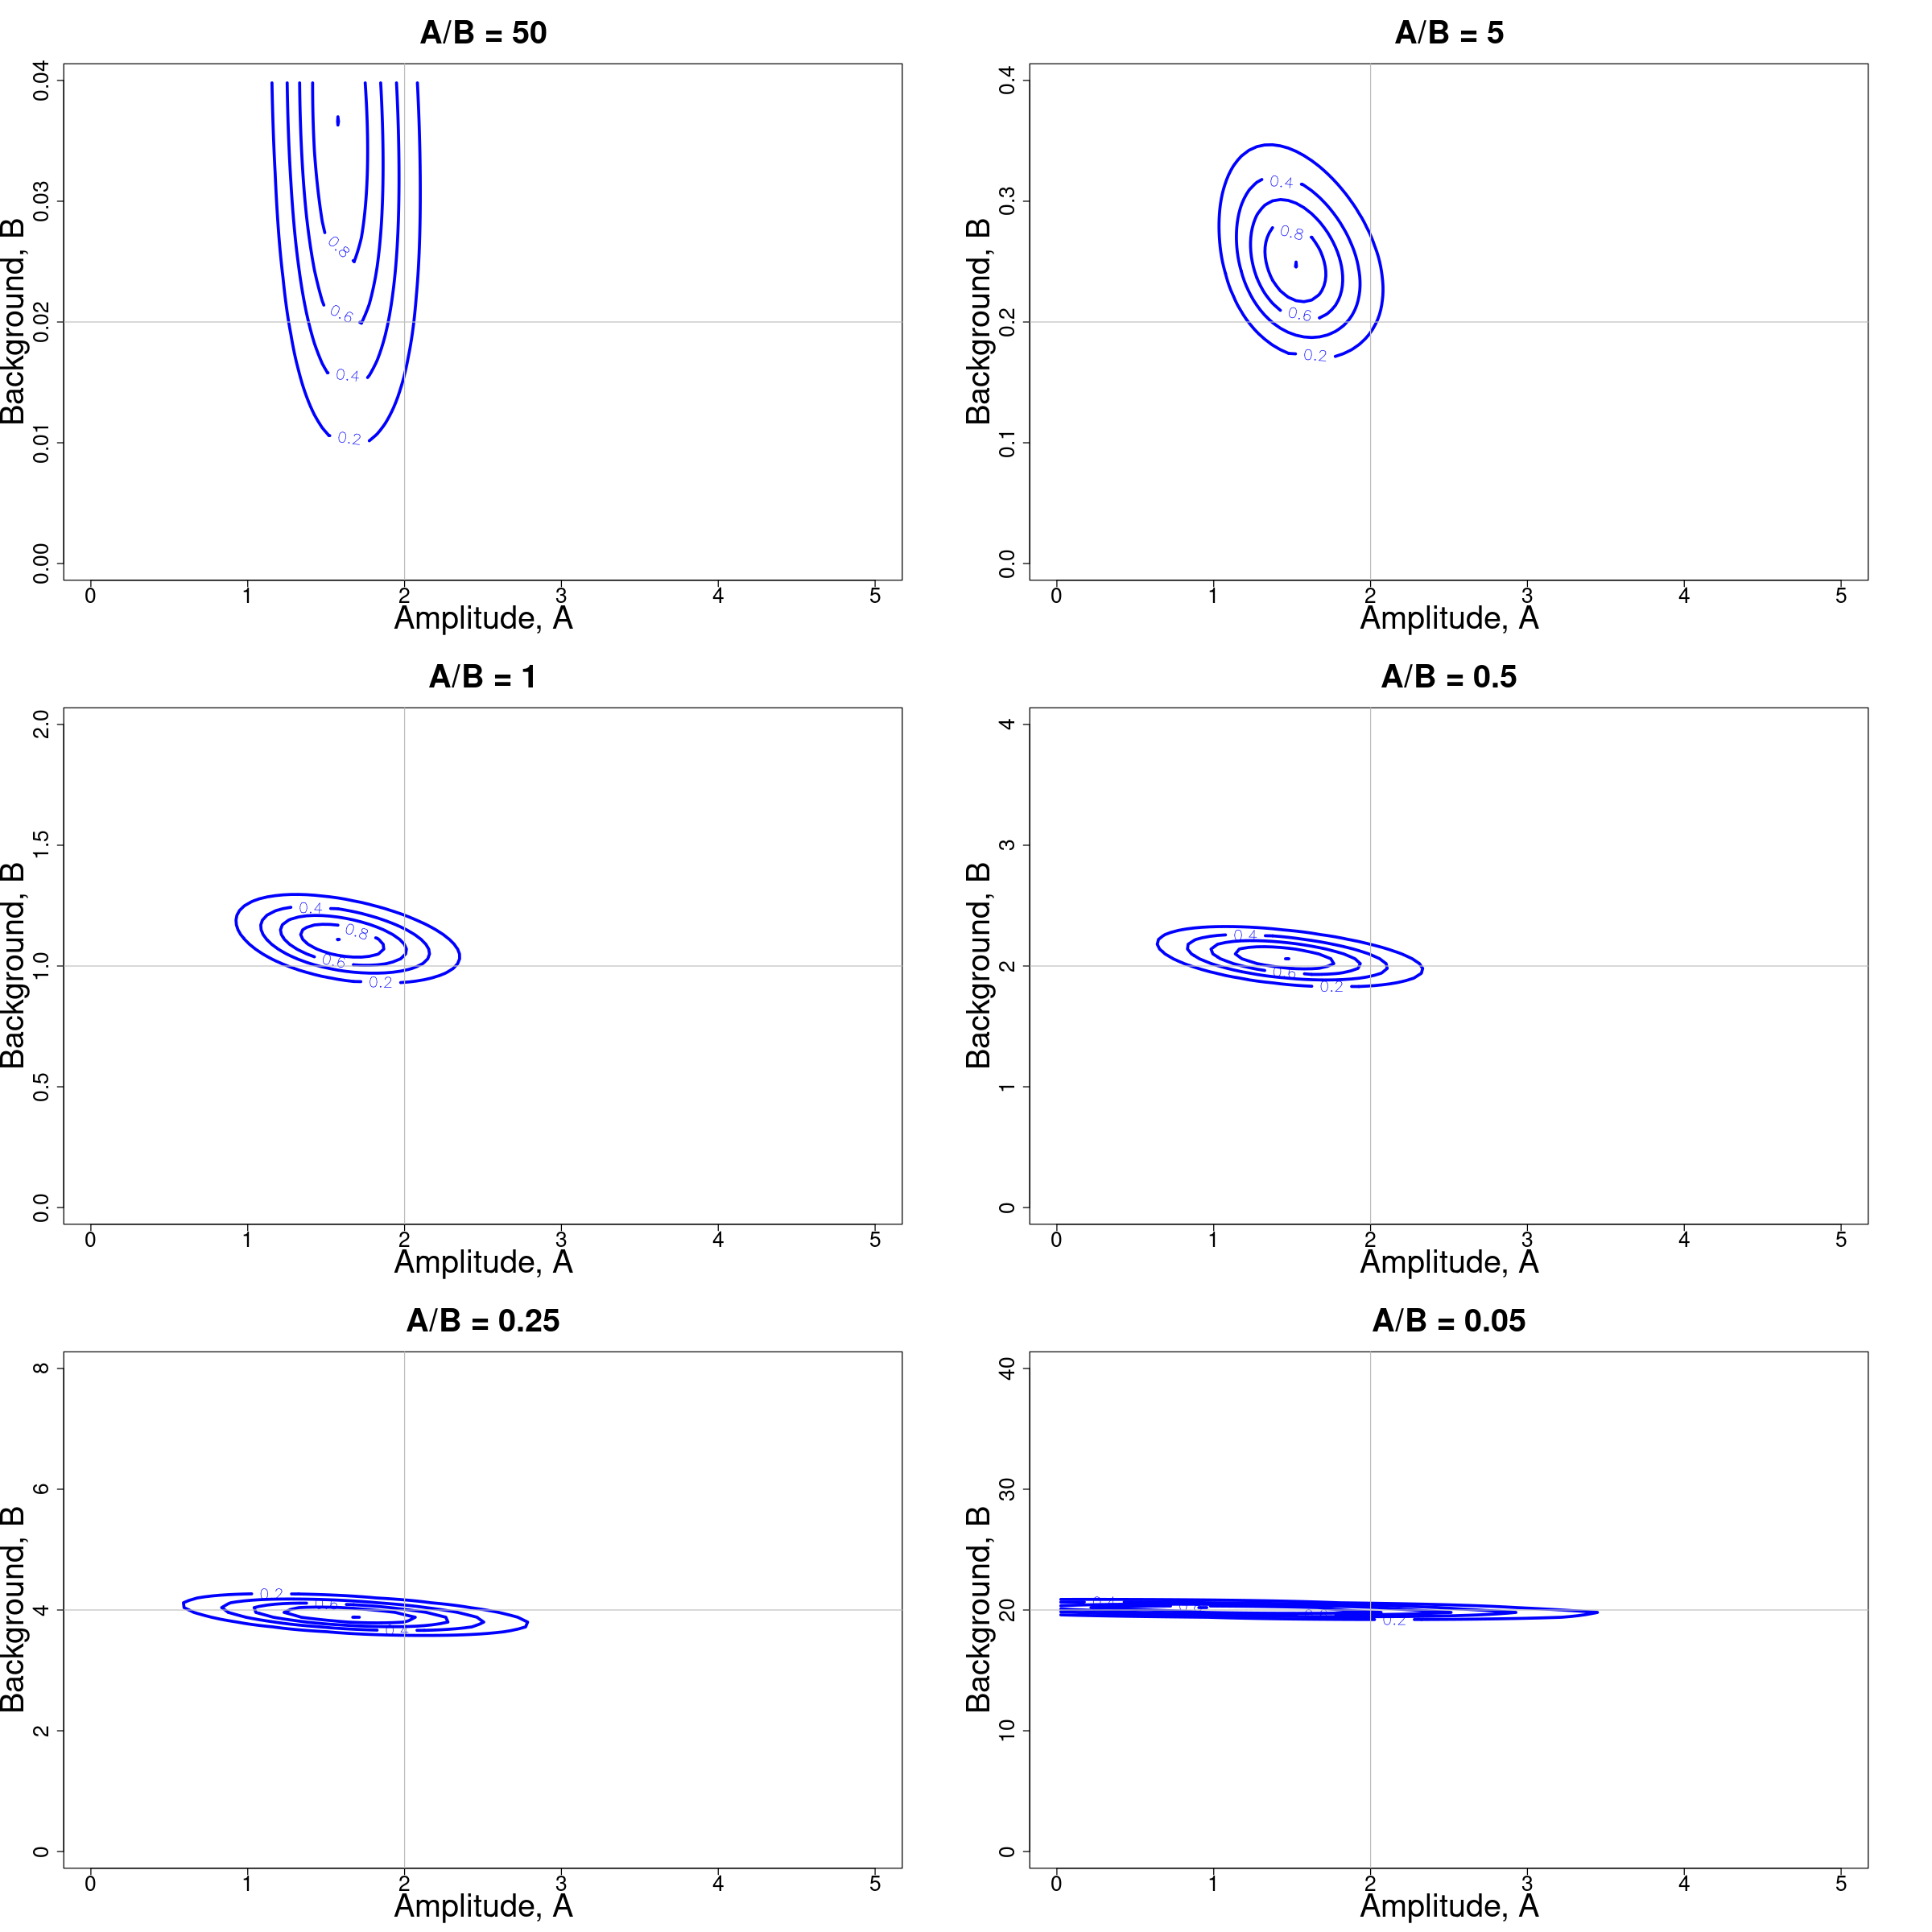

In [30]:
Alim <- c(0, 5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_A <- diff(Alim)/Nsamp
A <- Alim[1] + diff(Alim)*uniGrid


par(mfrow=c(3, 2), cex.main = 3, cex.lab = 3, cex.axis = 2, mar=c(5,5,5,5))
options(repr.plot.width=20,repr.plot.height=20)


for (b in B_true){
    set.seed(205)
    
    Blim <- c(0, 2*b)
    delta_B <- diff(Blim)/Nsamp
    B <- Blim[1] + diff(Blim)*uniGrid
        
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w) #resolution 0.5
    s_true <- signal(xdat, A_true, b, x0, w, Delta_t)
    ddat <- rpois(length(s_true), s_true)
    
    z <- matrix(data=NA, nrow=length(A), ncol=length(B))
    
    
    for(j in 1:length(A)) {
        
        for(k in 1:length(B)) {
            
            z[j,k] <- log_post(ddat, xdat, A[j], B[k], x0, w, Delta_t)
            
            }
        }

    
    z <- z - max(z)
    
    contour(A, B, exp(z),  col = "blue",
            lwd = 3,
            nlevels = 5,
            labcex = 1,
            xlab='Amplitude, A', ylab='Background, B',
            main=paste('A/B =', 1/b))
    abline(v = A_true, h = b, col="grey")
}